In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [2]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [3]:
presidential_account_apc = pd.read_csv('/Users/Desktop/Senti Project/2019/mbuhari1.csv')
presidential_account_pdp = pd.read_csv('/Users/Desktop/Senti Project/2019/atiku_acc.csv')
apc_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/apc1.csv')
pdp_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/pdp1.csv')
buhari_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/buhari1.csv')
atiku_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/atiku.csv')

In [4]:
apc = apc_keyword.append(presidential_account_apc, ignore_index=True)

In [5]:
apc.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096450410135553  Fri Feb 22 23:59:48 +0000 2019   
2  1099096417426202624  Fri Feb 22 23:59:40 +0000 2019   
3  1099096333573636097  Fri Feb 22 23:59:20 +0000 2019   
4  1099096171241500673  Fri Feb 22 23:58:42 +0000 2019   

                                       original_text      screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...     watsupafrica   
1  Images Of Bullion Van Entering Bourdillon, Hom...  iamchinedunwosu   
2  APC Reps Member, Jibrin, Arrested Over Attack ...    Betagistnaija   
3  Putin-Maduro-signo Libra. Jinete de la balanza...      profetafue1   
4                  APC will win by the grace of God     AhmedRsalisu1   

             author_id  replies  retweet_count             to  hashtags  \
0           2616078570        0              0            NaN  #Nigeria   
1            448630493        0              4            NaN       NaN   
2           1725913201        0              0            NaN       NaN   
3   969049064556912640        0              1            NaN       NaN   
4  1006052819881820160        0              0  TheNationNews       NaN   

                                       user_mentions  \
0                                                NaN   
1  @officialEFCC @OfficialAPCNg @OfficialPDPNig @...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                urls  
0                              https://goo.gl/DgvmHq  
1                                                NaN  
2  http://www.betagistnaija.com/2019/02/apc-reps-...  
3                                                NaN  
4  https://twitter.com/TheNationNews/status/10990...

In [6]:
apc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10187 entries, 0 to 10186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10187 non-null  int64 
 1   created_at     10187 non-null  object
 2   original_text  10174 non-null  object
 3   screen_name    10187 non-null  object
 4   author_id      10187 non-null  int64 
 5   replies        10187 non-null  int64 
 6   retweet_count  10187 non-null  int64 
 7   to             4042 non-null   object
 8   hashtags       1502 non-null   object
 9   user_mentions  1060 non-null   object
 10  urls           4036 non-null   object
dtypes: int64(4), object(7)
memory usage: 875.6+ KB


In [7]:
apc1 = apc.append(buhari_keyword, ignore_index=True)

In [8]:
apc1.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096450410135553  Fri Feb 22 23:59:48 +0000 2019   
2  1099096417426202624  Fri Feb 22 23:59:40 +0000 2019   
3  1099096333573636097  Fri Feb 22 23:59:20 +0000 2019   
4  1099096171241500673  Fri Feb 22 23:58:42 +0000 2019   

                                       original_text      screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...     watsupafrica   
1  Images Of Bullion Van Entering Bourdillon, Hom...  iamchinedunwosu   
2  APC Reps Member, Jibrin, Arrested Over Attack ...    Betagistnaija   
3  Putin-Maduro-signo Libra. Jinete de la balanza...      profetafue1   
4                  APC will win by the grace of God     AhmedRsalisu1   

             author_id  replies  retweet_count             to  hashtags  \
0           2616078570        0              0            NaN  #Nigeria   
1            448630493        0              4            NaN       NaN   
2           1725913201        0              0            NaN       NaN   
3   969049064556912640        0              1            NaN       NaN   
4  1006052819881820160        0              0  TheNationNews       NaN   

                                       user_mentions  \
0                                                NaN   
1  @officialEFCC @OfficialAPCNg @OfficialPDPNig @...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                urls  
0                              https://goo.gl/DgvmHq  
1                                                NaN  
2  http://www.betagistnaija.com/2019/02/apc-reps-...  
3                                                NaN  
4  https://twitter.com/TheNationNews/status/10990...

In [9]:
apc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30187 entries, 0 to 30186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30187 non-null  int64 
 1   created_at     30187 non-null  object
 2   original_text  30008 non-null  object
 3   screen_name    30187 non-null  object
 4   author_id      30187 non-null  int64 
 5   replies        30187 non-null  int64 
 6   retweet_count  30187 non-null  int64 
 7   to             17278 non-null  object
 8   hashtags       3979 non-null   object
 9   user_mentions  4404 non-null   object
 10  urls           7544 non-null   object
dtypes: int64(4), object(7)
memory usage: 2.5+ MB


In [10]:
apc1['party'] = 'APC' 

In [11]:
apc1.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096450410135553  Fri Feb 22 23:59:48 +0000 2019   
2  1099096417426202624  Fri Feb 22 23:59:40 +0000 2019   
3  1099096333573636097  Fri Feb 22 23:59:20 +0000 2019   
4  1099096171241500673  Fri Feb 22 23:58:42 +0000 2019   

                                       original_text      screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...     watsupafrica   
1  Images Of Bullion Van Entering Bourdillon, Hom...  iamchinedunwosu   
2  APC Reps Member, Jibrin, Arrested Over Attack ...    Betagistnaija   
3  Putin-Maduro-signo Libra. Jinete de la balanza...      profetafue1   
4                  APC will win by the grace of God     AhmedRsalisu1   

             author_id  replies  retweet_count             to  hashtags  \
0           2616078570        0              0            NaN  #Nigeria   
1            448630493        0              4            NaN       NaN   
2           1725913201        0              0            NaN       NaN   
3   969049064556912640        0              1            NaN       NaN   
4  1006052819881820160        0              0  TheNationNews       NaN   

                                       user_mentions  \
0                                                NaN   
1  @officialEFCC @OfficialAPCNg @OfficialPDPNig @...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                urls party  
0                              https://goo.gl/DgvmHq   APC  
1                                                NaN   APC  
2  http://www.betagistnaija.com/2019/02/apc-reps-...   APC  
3                                                NaN   APC  
4  https://twitter.com/TheNationNews/status/10990...   APC

In [12]:
apc1.columns

Index(['id', 'created_at', 'original_text', 'screen_name', 'author_id',
       'replies', 'retweet_count', 'to', 'hashtags', 'user_mentions', 'urls',
       'party'],
      dtype='object')

In [13]:
apc = apc1.drop(['id', 'created_at', 'screen_name', 'author_id', 'replies', 'retweet_count', 
           'to', 'hashtags', 'user_mentions', 'urls'], axis = 1) 
  

In [14]:
apc['original_text'] = apc['original_text'].astype(str)

In [15]:
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
apc['tidy_tweet'] = apc['original_text'].apply(cleanTxt)

# Show the cleaned tweets
apc.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   APC   
1  Images Of Bullion Van Entering Bourdillon, Hom...   APC   
2  APC Reps Member, Jibrin, Arrested Over Attack ...   APC   
3  Putin-Maduro-signo Libra. Jinete de la balanza...   APC   
4                  APC will win by the grace of God    APC   

                                          tidy_tweet  
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...  
1  Images Of Bullion Van Entering Bourdillon, Hom...  
2  APC Reps Member, Jibrin, Arrested Over Attack ...  
3  Putin-Maduro-signo Libra. Jinete de la balanza...  
4                  APC will win by the grace of God

I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score). Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [16]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
apc['Subjectivity'] = apc['tidy_tweet'].apply(getSubjectivity)
apc['Polarity'] = apc['tidy_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
apc.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   APC   
1  Images Of Bullion Van Entering Bourdillon, Hom...   APC   
2  APC Reps Member, Jibrin, Arrested Over Attack ...   APC   
3  Putin-Maduro-signo Libra. Jinete de la balanza...   APC   
4                  APC will win by the grace of God    APC   

                                          tidy_tweet  Subjectivity  Polarity  
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...           0.0       0.0  
1  Images Of Bullion Van Entering Bourdillon, Hom...           0.0       0.0  
2  APC Reps Member, Jibrin, Arrested Over Attack ...           0.0       0.0  
3  Putin-Maduro-signo Libra. Jinete de la balanza...           0.0       0.0  
4                  APC will win by the grace of God            0.4       0.8

In [17]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


apc['sentiment'] = apc['Polarity'].apply(getAnalysis)
# Show the dataframe
apc.head(10)

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   APC   
1  Images Of Bullion Van Entering Bourdillon, Hom...   APC   
2  APC Reps Member, Jibrin, Arrested Over Attack ...   APC   
3  Putin-Maduro-signo Libra. Jinete de la balanza...   APC   
4                  APC will win by the grace of God    APC   
5  APC has never won Taraba. It's been PDP since ...   APC   
6              Apc don start there scam at 11th hour   APC   
7  It's only the deaf, blind and confused that wi...   APC   
8      Major scam!!!! I repeat! Do not Vote APC!!!!    APC   
9  Am neither in support of #APC nor #PDP nor any...   APC   

                                          tidy_tweet  Subjectivity  Polarity  \
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...      0.000000  0.000000   
1  Images Of Bullion Van Entering Bourdillon, Hom...      0.000000  0.000000   
2  APC Reps Member, Jibrin, Arrested Over Attack ...      0.000000  0.000000   
3  Putin-Maduro-signo Libra. Jinete de la balanza...      0.000000  0.000000   
4                  APC will win by the grace of God       0.400000  0.800000   
5  APC has never won Taraba. It's been PDP since ...      0.000000  0.000000   
6              Apc don start there scam at 11th hour      0.000000  0.000000   
7  It's only the deaf, blind and confused that wi...      0.687500 -0.200000   
8      Major scam!!!! I repeat! Do not Vote APC!!!!       0.500000  0.465661   
9  Am neither in support of APC nor PDP nor any o...      0.421672  0.127841   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4  Positive  
5   Neutral  
6   Neutral  
7  Negative  
8  Positive  
9  Positive

In [18]:
dict = {'Neutral' : 0, 'Positive' : 1, 'Negative' : -1}

In [19]:
# Remap the values of the dataframe 
apc['sent']= apc['sentiment'].map(dict) 

In [20]:
apc.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   APC   
1  Images Of Bullion Van Entering Bourdillon, Hom...   APC   
2  APC Reps Member, Jibrin, Arrested Over Attack ...   APC   
3  Putin-Maduro-signo Libra. Jinete de la balanza...   APC   
4                  APC will win by the grace of God    APC   

                                          tidy_tweet  Subjectivity  Polarity  \
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...           0.0       0.0   
1  Images Of Bullion Van Entering Bourdillon, Hom...           0.0       0.0   
2  APC Reps Member, Jibrin, Arrested Over Attack ...           0.0       0.0   
3  Putin-Maduro-signo Libra. Jinete de la balanza...           0.0       0.0   
4                  APC will win by the grace of God            0.4       0.8   

  sentiment  sent  
0   Neutral     0  
1   Neutral     0  
2   Neutral     0  
3   Neutral     0  
4  Positive     1

In [21]:
apc.to_csv('apc2019.csv', encoding='utf-8')

In [22]:
del dict

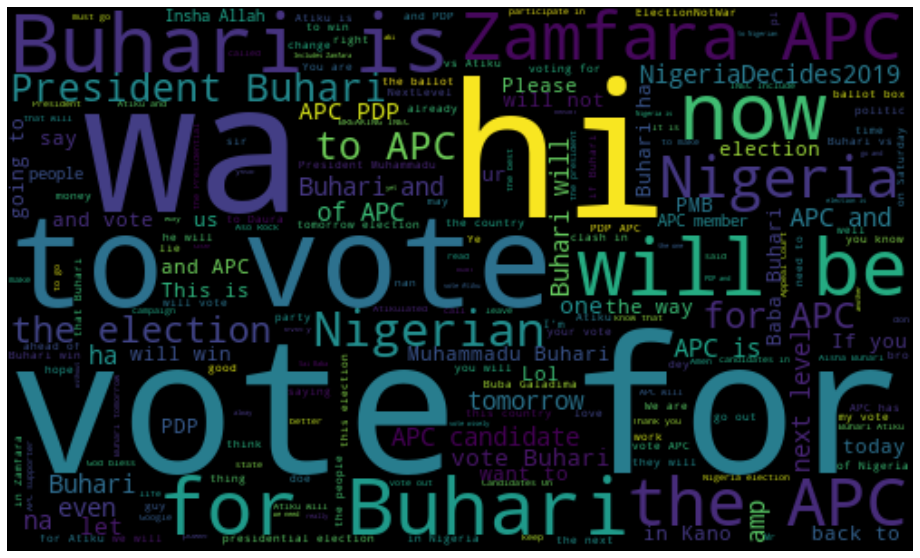

In [23]:
# word cloud visualization
allWords = ' '.join([twts for twts in apc['tidy_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(15, 10))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = apc.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tidy_tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) APC will win by the grace of God 

2) Major scam!!!! I repeat! Do not Vote APC!!!! 

3) Am neither in support of APC nor PDP nor any other party... What am interesting on is simple. "A New Face as President" NigeriaDecides2019 NigeriaDecides

4) __ last week i was able to convince you to vote for  and now the day has come. Don't forget "APC SAK"

5) Meanwhile CBN governor opened the vaults to APC goons. So many people will go into jail after this year's election. 

6) pdp & apc is not by force pls, be flexible. it’s okay for naij to be ruled under a completely different party, you will acc not die

7) The Future of Nigeria lies in your hands. Use your PVC wisely. Remember, every vote counts. nigeriadecides2019 apc pdp nextlevel makingnigeriaworkagain nigeria todaydeal atiku inec 

8) Lol. My we-share-a-fence neighbour is an APC big boy. The cars have been coming since 9.00pm. Everybody is happy. 

9) People seem to forget that PDP spent much more than APC 

454) Are You Ready Or Not?? Nigerians Are Ready To Move To The Next Level – APC Boasts  via Naijaloaded

455) More than half of those in the PDP will cross over to the APC after tomorrow’s polls. You may screenshot this tweet.

456) APC has no place in Biafra land and tomorrow our people must make sure that anything of APC is totally removed from our land! APC brought death to our land and must not see the light of the day after tomorrow!  _Ekwo    

457) Let's all stop being hypocritical & change d governmt near us 1st b4 changing dose far 4rm us. Let's change Lagos govmnt 4rm d hands of APC dat monopolize it all dese yrs, doing snail work &amp; deceiving Lagosians. Let's remove d speck in our eyes 1st 2 see d log in anoda ps's eyes

458) I also recall PDP prosecuted other governors in its party (E.g., Ibori, Alameiyeseigha). Has APC prosecuted any of its own? 

459) If you're among those campaigning for APC and Buhari reelection with the image below, shouting; PMB has done it! Your o


563) APC said buhari is already winning that he don't need to rig the election 

564) Omg, more is coming!! APC eh, this party can lie eh.. haha

565) His last address was expected to clarify the matching order which he gave the army at APC caucus meeting which was broadcast live, where he said that anyone caught snatching ballot box does so at the expense of his or her life. ElectionNotWar NigeriaDecides2019

566) Even APC's campaign is not playing now uncle. Why did you wait till today. For your info NTA has been airing Atiku's campaign jingles. 4 nw the station is nt airing any campaign jingles for now uncle.Just looking to score some cheap point for Baba body. What is your problem gan?

567) More reasons not to vote for dis fuckers APC Naira what kind of magic is this😂😂😂

568) APC adopting the same measure used during the Ekiti and Osun elections but God will frustrate them in this general election.

569) APC postpone election, just to rigged in Zamfara APC. Nice move. Giving Nige


782) Atiku to win APC to (try and) rig I hope it's the former DevilAndDeepBlueSea

783) Tomorrow Buhari will vote Atiku, am very sure, he won't be able to recognize the APC logo if not guided.

784)  is a thief, yet he is moving about freely, no arrest, no prosecution, no indictment from any court of law. Yet he is a thief, cos APC said so. Sometimes i wonder why someone will leave his brain at home to go and dance naked in the market place.

785) I am from Edo State,Apc Won't get up to 100 vote if this election is not Rigged.... As for Delta state, he should just forget about that State cos I know that state more than Benin...

786) Every right thinking Nigerian mst knw that last week election postponement was orchestrated by the APC &amp; INEC in a bid 2 include Zamfara &amp; Rivers in the ballots knowing fully well that they can't afford 2 lose any state as Atiku's popularity gives them nightmares. Doublestandard

787) He is bad because he works for a president in APC. You are good

977) Stanley Osifo is making me laugh 😂 Did he know how much the Presidential Form cost in APC primaries? 10-15Million votes ? Exaggeration 

978) APC is an ongoing problem. So devoid of ideas they have to steal ours. Nigeria, let's sit up &amp; vote right tomorrow. They have no plans, no ideas. If they did, we would have seen the ideas in action in the last 4 years. It is time for something different! 

979) Appeal Court didn’t clear Zamfara APC for elections – Senator Marafa, Ozekhome 

980) Their plan is to create an atmosphere of violence so  will postpone the elections in Kano state for APC RIGGING agenda Stay strong and resist them! We have but few hours left to liberate Nigeria from this TYRANNICAL regime NigeriaDecides2019

981) It is over for APC - Kwankwaso, Secondus boast as millions storm Kano stadium to welcome Atiku 

982) It is over for APC - Kwankwaso, Secondus boast as millions storm Kano stadium to welcome Atiku 

983) Rivers State must be the next. Court of appeal an

1222) New post (INEC restores Zamfara APC to ballot) has been published on Armada News - 

1223) do not do an Atiku on your dad... Your dad is older than us all and know what is good for our future... He was around during the days of PDP and now under APC.

1224) Primaries: Zamfara APC Chairman lauds Court of Appeal JudgementThe Chairman of the All Progressives Congress in Zamfara State, Alhaji Lawal Liman, has lauded the judgement delivered by the Appeal Court Abuja Division on the party’s primary elections ... - 

1225) Let’s leave the rerun that talk no go end. On this one we disagree. No way apc can win Governorship. Apc not being on the ballot only means the competition is almost nonexistent but you guys need to stop deceiving yourselves that you’ll win in. No need for the Dutch courage

1226) Yes Sir,come this Saturday we'll all say No to tyranny no matter how much money they spend. We will collect their money and still vote them out. Enemies of democracy. APC/CABALS MUST GO

122

1555) APC can't win delta, sokoto and nasarawa

1556) No Tension, No Shaking, No Doubt.....4+4 =8 APC/ / Till 2023. Nigeria and Nigerians Are Moving To The Next Level. Vote APC for Good Governance. Say No To The Selling Of Our Future,Say No To PDP Votes.God Bless Nigeria and Nigerians.4+4 

1557) (Sanusi tasks politicians on peace following Kano APC, PDP clash) has been published on Latest Nigeria News - 

1558) YOU NO GET MONEY, YOU DEY VOTE APC, ME I DEY LAUGH YOU GAN NI...😂😂😂

1559) Pls I doubts if truly  is a SAN, what Buba Galadima said isn't better than using illegalities to cure legalities as a SAN? Look at how APC has ruined your senses

1560) A true David!😁 Goliath, APC is in trouble😊

1561) 6.Secondus Would be Chief of Staff 7.Jimi Agbaje would loose in Lagos to APC and be compensated with a Federal Appointment.. 7.Peter Obi would be relegated to the corner😂😂 NNPC would be sold off to a shell corporation with very interesting names on the board.

1562) Not sure that is correc

1888) After seeing INEC Statistics on PVC Collection collected so far, which favour . Even PDP Chairman in Yobe State jumped the ship yesterday in Buba Galadima home State. I understand why Galadima still claiming that is a member of APC

1889) my question is who is deceiving PDP with the thought of winning this election ? When the likes of state like Lagos, Kano, Kaduna and katsina are very strong holds of APC and the states have over 15m voters between them

1890) Security Alert: Aftermath of Ashiru Attack; Oloriegbe (_IYO) Receives Death Threat Barely 24hrs after KS APC Senatorial candidate, Arch. Lola Ashiru was attacked by suspected PDP thugs during a visit to d palace of Olojoku of Ojoku wia he escaped death by whisker,his...

1891) Breaking: APC Publicity Secretary Condemns New IbomAirline, says Akwa Ibom people prefer to use night buses not flights

1892) But I don’t see APC winning Kwara. That’s an uphill task

1893) Base on myopic observation Buhari of APC might win this fort

2149) Baba is it that you didn't read what you wrote earlier? You categorically said "he sponsored thugs to harm the innocent citizens of kwara state" and that was what the APC senator in Abeokuta did so why is it that the police are yet to arrest him?

2150) APC is far better than your PDP. We are going to retire you guys from politics tomorrow

2151) May not win Osun and Kogi but Kano and Ogin are sure two odds for the APC.

2152) The issue of the logo on the Nigerian airways seems to be of more concern, and as been turned into a bigger issue compared to the disaster that summarizes the airways its self🤦🏽‍♂️ yea APC need some answering to do on the cost and all!! But pls d bigger issues is not d logo!

2153) This is the height of it. They had to arrest  The evils of this APC folks shall surely live after them FreeSenRafiu

2154) See o  what did I say about Igbos in lagos doing APC? Awon ore wa ma learn tomorrow lol 

2155) Subtle threat to the Igbo's in Lagos once again??? Please sho


2304) The chances of the  in Zamfara is slim. The political differeneces b/w the Governor and  would give the  good advantage going into the polls. Also the APC have not had enough time to campaign due to the court ruling. NigeriaDecides

2305) Please stop this now. Get your news right before posting. I dont support APC but i know for sure that desmond did not build that toilet.  that is the link of some of his work. Lets learn to appreciate little effort. No be everytime we go dey cause trouble

2306)  Mr. Samura, I would kindly ask the govt and people of Sierra Leone to investigate your credentials. The former APC govt was a mess and garbage for Sierra Leone. It is high time Sierra Leoneans investigate your corrupt crimes.

2307) If u dont believe the statistics. Just ask yourself if the financial status of your friends, family or you got better or worse within the last four years of this administration If no and you still vote APC then you have yourself to blame for your further mi

2548) Nigerians are wiser now. The devil we know is better than the broom wielding angel we don't know. After all that has been said about the PDP, they left Nigeria in a better state than your corruption fighting APC has done and will ever do. We want Unity and a BetterNigeria.....

2549) News Digest: Yobe PDP Chairman Switches to APC, Buhari; R Kelly Faces Fresh Claims of Sexual Abuse 

2550) APC is winning

2551) How A Tech Company Linked To APC National Leader Bola Tinubu Used Sophisticated Technology To Tamper With The 2015 Elections, Report Says | Sahara Reporters  via 

2552) Just posted: APC Technology – “pleased with the start to the new financial year… within management expect... 

2553) Sumthing that you mofos are not seeing is that .... If You are going out tomorrow with the mindset to vote either buhari or atiku its better off staying at home cus you are recycling the same corrupt government . APC or PDP how many more years before you all see it .Vote wisely

2554) Good mo


2800) APC Member: I will kill anyone that sleeps with my wife. PDP: Isn't that taking Laws into your own hands? APC Member: Are you planning to sleep with my wife?

2801) You see how low thinking and self-serving these APC pple are. Others are provided BusesForDemocracy irrespective of who ur voting for n dis low thinking pple are saying free buses 4only dos voting Buhari. Una bus go empty. Walahi!!!

2802) LoOoooool... ...the man has not sent the N10k yet for the TP o...I guess APC's many unfulfilled promises...

2803) The trust is that most of APC supporters are going to vote  . Nigerians may be funny people but they are not stupid.

2804) We shd be thankful to Buba Galadima, he is really taking APC Buhari to the "market place". 

2805) Election D-DAY: Compelling Verdict Shocks PDP, APC… 

2806) Nigeria, it's a day to Vote PMB/PYO for 2nd time. Vote Moral Leaders, stainless team, no RofoRofo btw or about them, no ApaPin, 'ShareShare', A rare, passionate, trusted & tested team drivin

2953) I see  Winning this election...  

2954) Does Twitter pay people for been foolish cause I don't understand the foolishness that goes on here on a daily.. vote Atiku for jobs to reduce the toxicity on twitter Nigeria, largely caused by loss of jobs Under Buhari..

2955) Bourdillion is cashing out big time.. Buhari Mr integrity is working so hard for reelection. We tot they said they performed excellently well. Why are they emptying the treasury? Never again Buhari.. Never again!!! 

2956) Observation!!! This election is a very close mark race between  and  but I see  winning the election... AtikuWillWin Let's all meet at polling units....

2957) Please who typed this. I sure know it wasn't you

2958) Vote Buying: Buhari raises alarm over huge dollars in circulation  -- nigeria news

2959) Not even a Buhari fan but I love this song 

2960) If you said he is the best to govern that means you don't know the meaning of your name,go ask your parents again how you got this name,voting b

3112) You have only one vote mind you Minus one we are moving to the NEXTLEVEL NOONE WILL MISS YOU AND YOUR VOTE WITH YOUR CHURCH MIND I'M VERY SURE YOU DID NOT VOTE BUAHARI IN 2015

3113) That’s why you’re supporting Buhari mtscheew 🙄

3114) Hehehe... Thought it's because of Buhari.. Haha

3115) President Buhari addresses Nigerians Ahead of General Elections | WATCH 

3116) What do you mean? If a man @80 doesn't love kids what will you call that?

3117) OK NEXT!!! 🚶🚶🚶

3118) This one isn’t on Youths please Ahmed Buhari and whatever is doing him is on his own. Besides he is 41. 

3119) The government that couldn't take us to the promise land when the oil was selling high.. Why do you think they'd take us there now sir ?

3120) Y'all niggas need to chill out for real. We tryna vote out Buhari today NigeriaDecides2019 No distractions please GNWA

3121) Hi friends,  Follow this link and vote for my kid sister, who is contesting for Miss starlet Africa. For your vote to count, you have to 

3500) Happy Elections Nigerians. atiku buhari inec icc

3501) Most people here supporting buhari and atiku dont even have pvc s🤨 

3502) In few hours to this time,  will be announced as the  - Elect while  will be the outgoing President. LetGetNigeriaWorkingAgain NigeriaDecides2019

3503) Lol like an erection to vote for atiku abi 😂

3504) President BUHARI has completely damaged DEMOCRACY in Nigeria. Well I don't blame him because Some persons in the Opposition now are very people who Betrayed former president Good luck Jonathan in 2015 and installed this corrupt, incompetent, clueless,dictator president.

3505) But Democracy is not for only one party,assisting voters by every lawful means should not be overemphasized. Concentrate on better things joor

3506) Lol 12 candidates already redrew to support Buhari instead... maybe you should start making plans

3507) Am ashamed children of democracy who support their oppressor vote energetic youth who look like you don't vote for ancestors 

3885) "President Muhammadu Buhari has warned of grave consequences for those who steal ballot boxes or attempt to disrupt re-scheduled elections." Aljazeera . Me: Responsible journalism!

3886) This weekend is somehow for me as a Nigerian & Man United fan. I have to choose between 2 devils. Buhari / Atiku to win the election Liverpool / City to win the EPL I choose ATIKU &amp; ManCity What do you think  NigeraDecides2019

3887) For the past 10 months APC has not won any online poll. Now I out will them say, online poll is not important, the real voters are not online yen yen yen. In 2015 when the polls was in favour of Buhari it's important, now it's not. Una eyes go clear soon!

3888) By God's grace BUHARI WILL WIN

3889) NATIONAL BROADCAST BY PRESIDENT MUHAMMADU BUHARI ON FRIDAY 22ND FEBRUARY 2019. Dear Nigerians, Finally, we have reached the eve of the rescheduled first round of this year’s general elections. 2. Tomorrow,... 

3890) Sir, what we need at this time is divine intervent

4218) THE ATMOSPHERE IS VERY THICK WITH BUHARI'S VICTORY, AND THE FIRST RESULT FROM THE FIRST POLLING BOOTH WILL SHOW IT. GOD IS GREAT!

4219) Abeg get out of here. Were you not among the people that brought this curse upon this country. And you think buhari the General will freely allow himself to be defeated.

4220) You make others poor, and tell them is for their own good. Yet you ride presidential jet. Now I know that it is your pocket you not for the good of the nation.

4221) 😂😂😂😂your love is amazing! Thanks

4222) They can't be original becos u still have NO common sense.

4223) my Nigeria brodas.... please vote peacefully.... chose your leaders well..... +254 is waiting to see buhari voted out and atiku voted in..... NigeraDecides2019

4224) What do they know? Even those that knew his wealth was ill-gotten, they still try to justify why we should prefer a theif over someone who's fixing Nigeria. Though Buhari is without fault, but his performance is better than 16yrs of PDP.

4

4551) Tomorrow is not all about buhari, Atiku so who so ever, it's all about the future, it's all about Nigeria so let's keep our differences aside and vote wisely and may Allah (God) choose the best for us, so let's vote peacefully...

4552) All key appointments are of religion? Herdsmen-farmer clash: How many arrest ? What happens to land left by fleeing survivors? Actions speak louder than words.

4553) Is it no claimed that that Boko Haram has been defeated? Does Buhari not brag about no part of the country being occupied by Boko Haram? Where from the attackers now? How did they kill so much? Why did the military warn against embarking on campaign. Lies &amp; APC, its in the blood

4554) Lol.. I didn't even support 53 in Lagos.. I'm sure it'll be at least 70 percent for 

4555) 🤣🤣🤣🤣🤣🤣😂😂😂. He seems to be energetic now, moving up and down 🤣🤣🤣🤣

4556) Are u for real?

4557) They don’t need to snatch, they would be able to stuff ahead.  see shame

4558) Check world exchange rate for th

4884) Let it be on record that if Buhari wins,dat simply means dat,my Vision is complete.

4885) Buhari wants to win so badly 

4886) This is a good omen. Nigeria will be good when Buhari is kicked out 

4887) The same   that disenfranchised Nigerians in Osun and Ekiti now talk about anti rigging. We know better.    

4888) Buhari most win insha allah

4889) I don't know what they discussed because I wasn't part of the meeting and VP was also sent on errand. But good to know you were invited for the meeting as one of service chiefs

4890) When my Mai guard told me Buhari will win tomorrow's election, I laughed in Swahili 

4891) U look beautiful and from you tweet, it must be highly cultured. You responded with love even to her worthless attack. Kyong, you are a woman

4892) The energy Buhari put whilst he said anyone caught stealing ballot boxes shot at sight is exactly the energy i expected for corruption when he got voted in 4yrs ago. That energy suddenly came back on his way out da

5123) I'm from Anambra State and tomorrow, I shall join millions of Nigerians to send Buhari back to Daura. As AtikuThanksNigerians, I enjoin all Nigerians to take one more bold step and make this last sacrifice(s) for the sake of our future and that of our Country

5124) From all indications, peer-to-peer sampling, online polls, and interactions, most Nigerians want to be out of the love story with President Buhari. NigeriaDecides2019 ElectionNotWar

5125) No single individual can solve all our problems since no one is a reservoir of knowledge and wisdom. I urge PMB to show leadership by encouraging the younger ones...

5126) They didn’t want us to vote, so they unleashed Thugs on KwaraSouth but like Fela sang, “Dem fit kill Sankara, but dem no go fit kill him spirit.” We’re back to say Buhari Lekansi, and Otoge to Rafiu. This time tomorrow, we would have FreeSenatorRafiu from representing us!

5127) Same here! Dude got us all hoodwinked in 2015! Now we know better.

5128) Full Text O

5276) Lol

5277)  congratulation my able incoming President federal republic of Nigeria. Expect a congratulation called from President Mohammad Buhari tomorrow God Bless Nigeria.

5278) The fact is you say one thing and your body language of which you are Famous for sends a different message. As of your oath to uphold the constitution, you have made nonsense of that at every turn. Nevertheless, thank you for this timely lies, It could actually save lives.

5279) Your Excellency  Am sure you can feel the victory in the air already.wowwwww.  _akin1 

5280) We ain’t interested ‘

5281) Okay.Ladies and Gentlemen👊..We are having an online WhatsApp Poll😁 Kindly pick a no from the candidates below👇👇👇 MUHAMMADU BUHARI-- 1 ATIKU ABUBAKAR-- 2 KINGSLEY MOGHALU-- 3 OMOYELE SOWORE-- 4 FELA DUROTOYE-- 5

5282) Ok

5283) Is a president with The Military swiftness of Buhari The cunning wit of Atiku The Education of Fela Durotoye And the Integrity of Oby Ezekwesili Too much to ask? NigeriaDecides2019



5537) My uncle is the ward chairman for APC while my younger brother is the secretary for the pdp in the same ward, their banters is always hilarious and interesting to see

5538) Buhari can't win without rigging.

5539) Are these not his grandkids?if he doesn't love them,who will?

5540) Akwa Ibom state governor was elected same time with Buhari in 2015. The man started and floated a state-owned airline but fg failed in its own.

5541) Buhari is best and he will win insha Allah.... Atiku you are wasting your time telling people lies....LETS SAY NO TO LOOTERS, ALSO SAY NO TO SELLING OF NNPC...

5542) True talk!! One of your fan from IG❤

5543) Thanks sir. That's my plan to leave home as early as to 5. I think I will take ur advice bcos wifey don dey vex o bcos we already agreed that I leave 5am.

5544) I don't know how you were brought up but in my house it was a sin/crime to insult and curse people even a junior, my parents never for once called we the children big head or something. 


5644) If Buhari wins, the next level na to chop sand. Be wise. NigeriaDecides2019

5645) Cruising a benz while Nigerians groan in acute poverty.

5646) It better that be but Buhari is a SCAM and DESPERATION don set knowing fully well it’s OVER 

5647) Google have been paid to scam us all, it's not real. Other sites still have it at 362.. Vote Buhari out

5648) Vote for whoever you think is right to vote for tomorrow. Don't let anyone influence your choice. But first, think, does Buhari have sense?

5649) So in ur mind now, una don invent something great.. Mumu cannot finish in this world Ben the debtor self dey talk.. Show us ur constituency project for 4 years NigeriaDecides2019 Nigeria

5650) Happy birthday!

5651) We are confident that the Nigerian political gladiators would ensure peaceful democratic process & safety of everyone; their families, friends & associates, all Nigerians and foreigners     UnitedNationsSecurityCouncil Africa 

5652) SORRY!!! *Buhari to win Atiku *Liverpo


5709) Ma'am May God Bless you. Amen One thing is for sure is that History will surely remember you stood with Nigeria and together Nigeria will progress.

5710) President Buhari will win tomorrow Insha Allah NextLevel2019

5711) Under Buhari, we've conducted more mass burials than wedding ceremonies. NEVER AGAIN! ComeOutAndVote4Atiku

5712) This buhari's address is one too many. All of sudden has remembered the need to address Nigerians! Tell buhari,Nigerians are not used to his addresses. We don't need them now!

5713) When the narrative suits you, you will castigate the buhari govt., but when MBS report came out with the positive GDP growth you kept quiet. When it was recently reported that the Nigeria has overtaken SA as the biggest economy in Africa you kept quiet.

5714) Nigerians are too easy. You guys really believe a dollar is now 184? You deserve Buhari.

5715) Buhari will win Delta? E be like say den don do give this one 

5716)  come clear this guy doubt.

5717) Don't vote 

5933) I swear all my life that  will win ,the same way I swore that _inside will trash ya ! I don't swear for free 31504976

5934) It’s really hard to believe that in the year 2019, Nigerians don’t have Power supply to watch election preparations and preamble but those to be elected into office would have u believe that they are the best for the job . shamefulcountryNigeria   

5935) The psychic that predicted this one is a psycho. Buhari will be lucky to make even above half the numbers he made nationwide in 2015. He can’t boast of the same enthusiasm and or support, which have gradually declined steadily since he took 6months to get ineffective ministers

5936) This baby is amazing, Even unborn baby will testify to how great ATIKU is. Than that of Buhari, that his wife Aisha Buhari Confirmed his Wickedness by telling NIGERIANS to decide between Poverty, begin to reduce and wealth

5937) Answer the question ma. Respect people, yes. Over hype them, no. "Buhari, you are the best thing t

6058) He will start trekking, the fall will be great! Y'all are flying presidential jet now.

6059) On twitter, everyone wants to vote Atiku, at the office and on Whatsapp and instagram I see Fela Durotoye, at home, I'm hearing Buhari. Which way?

6060) lol dollar drop likeeeee buhari for the kill

6061) After Buhari's Threats, Canada, UK Urge Nigerians To Go Out And Vote  Benin Prince, Osmond Eweka, Sentenced In America Over Fraud  VISIT  FOR MORE .... THANK YOU. GOOD MORNING . NigeriaDecides2019

6062) "Buhari doesn't love Nigerians", Saraki breaks silence on President's ballot box comment 

6063) Stop Killer Herdsmen and Boko Haram terrorist from roaming freely, Reject President Buhari. Vote PDP's Atiku. If you ignore me, be prepared for another lackluster 4years of the Daura Man.

6064) how can you be so sure that they are Fulani What If they're Yoruba and disguised like Fulani?

6065) Choose wisely! NigeriaDecides2019  Vs 

6066) Very true

6067) Let me put my bet out here. Strang


6240) Google wants to deceive us so we will vote Buhari. Who is the developer that messed with this graph? 🤔 

6241) For the first time my actions will be in line with Buhari's wishes as contained in the picture. Atiku is our next President. BuhariBackToDaura

6242) We that sold  to Nigeria in 2015 have finally been afforded the chance to make things right by sending him back to his country home in Daura.

6243) Because being original needs creative thinking which z alien to buharist and APCist

6244) Lol

6245) Last night in the rock, from tomorrow Daura is your new resident 

6246) Happy for you

6247) Exactly

6248) Do you know that most anti-buharist and atikulated Nigerians lack critical thinking and in depth understanding In history, 1959 'incumbent' interest won, 1979 incumbent 'interest' won 1999 'incumbent' interest won So, accordingly 2019 incumbent wins😃😃😃 Buhari wins Hurrah😁😃

6249) Lie. Read again. It was the dept/ministry of agriculture that did that just to assist the f

6461) Who the hell has the time to read this Dear John?? Have a great election Bubu

6462) Perfect

6463) Nigerians use your head, Vote wisely and vote out Buhari and his cabals

6464) When AGF Mallami collected $15m on Abacha loot, when the money was already in Nigeria,which was more than the Swiss lawyer who helped us traced the money. Clearly you know little about this fraudulent administration 😂😂😂 But shaaaa that dose not affect our love 😎😎😎

6465) May Allah protect him, make d leadership easy for, May Allah be his shield and sword President_Muhammad_Buhari ameeeeeeen

6466) When you have pple who can think on their own that what u get sir, they've failed in all ramifications.

6467) Unbelievable!!!. This cute matured-little girl made sense and this really notifies Nigerians of how former President Buhari is going nowhere.

6468) Buhari. Atiku 2.50 3.12 Bet wisely who will u risk ur money and win😎😎

6469) Amen, may God bless our democracy and also open your eyes to see that some of

6822) Bros is Nigerian society even normal? Only abnormal people see Nigeria of today as normal. Pls come out from this your funnel mentality

6823) Abeg just GoOutAndVote no arguement just vote for your choice, but am thinking that  is more competent

6824) I just finished convincing some atiku fans. Guess what its Nextlevel

6825) Oya see am! Your candidate Vs Mine! '...are my friends not entitled to be rich?' -Atiku. 🙆 'I will pay 350billion in oil subsidy'? -Buhari 👀 

6826) latestNigeriaNews Buhari does not need to rig an election he is winning 

6827) Many of us will be so happy if Buhari lose this election

6828) My vote is for u baba buhari and believe every Nigerian that knows what he's doing will vote for u because i know u will take us to a greater future by the grace of God almighty we thank u for the service u are giving us sir. 4+4

6829) We only want free, fair and credible elections. History will repeat itself soon.

6830) Atiku can be Probe and his vice president Obi i

7074) Yes oooo! We all need to go out and vote for atikulated if we really want to stop the killings, tribals and religious bigot. Let's do it by voting Buhari out. 

7075) I don't allow sentiments becloud my sense of judgment. Buhari has not done well in the area economy but in the area of infrastructure, let's be candid, baba has done well. The Train revolution, Airport development, Roads construction etc. That's a plus for Buhari at least.

7076) To each his own

7077) Nobody wants ur vote haj

7078) If  doesn’t win tomorrow he will be happy because the whole country would wish him well truly and pray for his peaceful retirement

7079) Sure

7080) Be wise 2moro my vote is for  and  

7081) That is the Presidency ... LOLx First 9ja Family

7082) Best of luck Baba Buhari 

7083) Safe trip

7084) You’re just wasting your time bruh Buhari will win.... anyway safe journey 🙏🏽 

7085) Buhari won't win Edo, except the outcast, Oshiomole is writing the result himself.

7086) Omo people don t

7376) Buhari Arrives Katsina for Saturday’s Elections  breaking featured latest nigeria

7377) Preaching hatred? olodo.... Ur smart phone is smarter Dan u

7378) If he has not done it in 3.5 years, he won't do it if he wins. Y'all better do a better proposal and get Atiku to do it when he wins. Only God is indispensable,NEPA Bill is as dispensable as they come

7379) Aisha Buhari be dropping riddles like it's no man's business. I have a feeling she'll spill a lot more after the elections regardless of the results. NigeriaDecides2019

7380) Atiku as winner; Buhari as competent loser.

7381)     , you need to read this tread on NigeriaDecides2019 by an erudite writer . He espouses how the contest isn't just between  and .

7382) Nigerians shouldn't complain,this are the kind of things we LOVE...Ghana and South Africa,even small Rwanda are becoming a 22nd century nation and we here guning for the stone age

7383) Don't let anyone bully you because you don't support Buhari or Atiku. If you

7630) Lol... In this same Delta which I reside? Many of Ogboru's supporters are even going to vote Atiku. Keep giving yourself fake hope. Buhari won't get 30% of Delta votes.

7631) Obasanjo actually brought growth and if we continued his progressive policies we would have gone very far..... Whoever wins should borrow from them Don't conflate the main issues and import of your tweet with Atiku's supposed stealing in 1999 - 2003.

7632) 2019 General Elections: UN Speaks Ahead Of Buhari, Atiku Contest 

7633) All the best!!!

7634) Guy, pray to God to bless you like me and beyond. I won’t say more than that.

7635) You are going about tarnishing someone's image. Like you are a saint. You have been Perfect all your life. Face your imperfections and deal with it than shooting someone. I can imagine what buhari Govt has made you be

7636) Exactly why I respect yours too boss.

7637) But y’all know if Atiku doesn’t win tomorrow, we aren’t accepting him too in the next elections right? We onl

7878) Lol who coined this phrase you are using? Muhammadu Buhari telling the world we are lazy! Another reason to kick him out.

7879) Whatever, but even if that’s your intentions it won’t work in our own NIGERIA.

7880) Please don’t vote for Atiku. Don’t make that mistake. It’s okay If you don’t like Buhari, there are other competent candidates. Not ATIKU. Thanks.

7881) We will soon get to our most preferred Next Level soon. Next level is the game and Buhari is a surebet oooo. 

7882) The aim is not to test your integral, dexterity and intellectual prowess or to insult you. I was only responding to your previous post. Please don't take it out context. No offense meant.

7883) NIGERIA DECIDES: WHAT BUHARI AND ATIKU HAVE SAID ABOUT ELECTRICITY President Muhammadu Buhari is seeking a second term in office, he believes that the first four (4) years of his administration was not enough to solve the current crisis in... 

7884) This just happed in my house My 5 year old son knows that' the

8150) President Buhari gives a statement ahead of Nigeria's elections after it was unexpectedly delayed by a week NigeriaDecides

8151) Oga when you lose, please call Atiku and congratulate him. Please don't do strong head

8152) President Muhammadu Buhari has a new fan in Issa Aremu, the Kwara governorship candidate of the Labour Party, who has applauded the Nigerian leader’s directive on ballot box snatchers in Saturday’s general elections.  NigeriaDecides2019 Nigeria

8153) Safe journey, may Allah make him return as president elect.

8154) U were better doing your 'twitter afternoon gain ' this is not working for you

8155) Buhari didn't cut of his neck . He had a sexual misconduct issue so he cut off his penis

8156) Dis is so true... Jst passed tru d place some hours ago, must confess I'm impressed. ILoveMyCity

8157) Have a great day

8158) I can’t wait to send you back to your cows 🐄. They must have missed you so much.

8159) LEADER OF YESTERDAY BECOMING LEADER OF TODAY AND ARE 


8435) How many PDP members are in jail pls care to name them?thank u

8436) Obviously he didn't give a damn, I mean, why would he? When his family were always safe and secure from physical harm?? We need change, but this time, not  kind of change, Sir, you've gotta leave ... Time's Up ⌛ NigeriaDecides2019 NigeriaDesides2019 Nigeria

8437) No experience in governance whatsoever....why must it be presidency?....a vote for sowore is indirectly a vote for buhari.... let's unseat the current evil....then chat a way forward to phase out These old generals

8438) You're really funny. A man who has always been accused of supporting herdsmen and even paying them shouldnt talk about Fulani when they're killed really? If it was the other way round, same Elrufai and Buhari will be fingered. What's the matter with you?

8439) Oga Ben, how are you doing today? I've fully confirmed his direction of argument. He claimed that Buhari operates autocratic style of Government. Then I gave up my argument..

8645) Atiku is ready to buy d Presidency. He has d resources to achieve dat goal. Buhari's haters should happily vote in Atiku nd wait.

8646) 2015: Sai Buhari Sai Baba If GMB doesn't perform, we will vote him out. 2016: Buhari plunged Nigeria into economic recession, insecurity, scandals, nepotism 2019: I am neutral. Messi is better than Ronaldo Hypocrites😁

8647) 2mrow will be ur last day in ds Aircraft owned and serviced by Nigeria's Commonwealth but which you, your Boss and d Cabals hv turned to family vehicle. We want to ask you a Question plz - Have  ever entered or Enjoyed this Aircraft the way you and family Enjoys it?

8648) Who else has noticed that President  has made more broadcasts and given more interviews and press conferences to the Nigerian media and public in these last 2 weeks before the elections than in the 4 years he has been President of Nigeria? Somebody is desperate methinks.

8649) And then they end up looking older than you making everyone to question your ow

8902) Good gentlemen.

8903) Currently on my way, will do it again even if the election gets postponed. Ready to pay any price to have Buhari returned to Daura. 

8904) This is supposed to be a meaningful and engagement with a public official and not a mudslinging contest. Even if you are paid to do this for a living, surely you can do it with a little more decorum.

8905) No Tension, No Shaking, No Doubt.....4+4 =8 APC/ / Till 2023. Nigeria and Nigerians Are Moving To The Next Level. Vote APC for Good Governance. Say No To The Selling Of Our Future,Say No To PDP Votes.God Bless Nigeria and Nigerians.4+4

8906) The truth about the matter is that General Muhammadu Buhari is a trustworthy person although his cronies may not be the most noble people. I believe that it is imperative we go out in large numbers to vote buhari to the next level !

8907) Lol wonder why atiku keeps getting roped in with buhari. he isnt the one who has failed twice (once as a head of state and once as a presiden

9148) Me go win myself

9149) So no one is perfect!

9150) Sending him back to Daura will definitely not fail.... If you know you know......

9151) Nice one What about Billions of dollars PTDF funds that went missing under him, What about unchecked number of briefcase with foreign currency that he travel with as head of state?

9152) At the lower level of ececution of the coup, one of those who was tricked into participation was Gen Atom Kpera who is 78 years old. Another living participant was Lt Juventus Ojukwu. He was Buhari's coursemate. Those are averagely 20 years older than Peter Obi

9153) Buhari would win.. Although am voting for Atiku.

9154) “The objective is clearly to stoke up religious division for political gains”- Buhari on… 

9155) What a good thread I wish I can like it more than once.

9156) 12) Zara Buhari bank of America, $1.3b.. (13)Amina zakari citi group bank New York $1.8b.. (1 4) Baba Haruna jauro. Ally financial bank $2.2b. (15)Umaru Dambatta bank of America,

In [25]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = apc.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) It's only the deaf, blind and confused that will not see how backward buhari and apc are. Nigerians are out to reclaim their country and they are voting pdp. By Sunday morning this will be clear to u

2) APC Nigeria is a total failure. Security zero, economy zero, and they are shouting next level, and from experience next level in a game is usually harder. We must get Nigeria working again come tomorrow insha Allah. Is of this mess here and there.

3) Yes it is wrong to copy what you condemned in total. Called it scam, vote buying, called it deceit. So why copy what you totally hated. Apc is so fake.

4) Lets Flush APC pending Diasters, bad Economic, unbearable poverty,unemployment as we get Nigeria Working again with Atiku/Obi NigeriaDecides2019 2019Elections ElectionisNotWar

5) ElectionNotWar All d people who supported troops been deployment during d 2015 polls by GEJ's administration 're d one complaining dat Apc wanted to use military deployment 2 sca


316) APC propaganda as usual 

317) Fake News bros Naira rises to 368/$APC must go

318) Nigeria Elections: IG of Police speaks on arrest of APC Reps member Jibrin, PDP Senator Ibrahim 

319) Cause in as much as PDP have a lot of bad history, the one APC has now,I think it's terrible..

320) God is not pleased with this. APC is of the devil. 

321) Now I can said woth my chest out that APC are a desperate party... they want to do anything to hold on to power. I just hope our votes would count.

322) Election: APC Using Military, Police To Arrest PDP Leaders Nationwide – Secondus 

323) Corruption is not been fought one sided, if he's fighting corruption, he should fight every single corrupt politician. The reason most corrupt politicians joined APC is because they're scared of being probed, so tell me which corruption is Mr President fighting!!!?

324) Each time I watch Festus Keyamo on TV, I see this venomous anger written all over him anytime PDP is mentioned. Can't understand why. 

622) Only in Nigeria does INTEGRITY mean the same as LIES, FALSEHOOD & IMPUNITY no thanks to the APC.. VOTE THEM OUT, Compatriots!!

623) Nigeria decides: How APC govt is allegedly intimidating traditional rulers for votes – Bauchi PDP  ElectionNotWar

624) Believe me i don't know how to use weeds or any other type of drugs but in sha Allah this will be my celebration for Buhari, Ďan-alkali, Yaya Bauchi and APC sak's victory. __dopest _Anas _NB APC_kawai

625) Google must be APC of shit

626) In a statement dated February 20, signed by National Publicity Secretary of the APC, Mallam Lanre Issa-Onilu disclosed that the attack which took place in Ojoku town in Kwara South Senatorial District of the State has left eight persons injured and two others dead FreeSenRafiu

627) New post (Police reveals number of dead, injured persons in APC, PDP Kano clash) has been published on  - 

628) APC can never win Edo State. Dey have never won dere while now? 4gt abt who's ruling Edo State is 4 PDP.


796) Emir Sanusi reacts to APC, PDP’s bloody clash in Kano 

797) Nigeria decides: How APC govt is allegedly intimidating traditional rulers for votes – Bauchi PDP 

798) I can go on and on. Not to talk of Buhari projects. I've come to realize that some people won't vote for APC due to bigotry. We've tarred virtually all roads in Printing village, we use the roads together everyday, but they are still saying APC is a failure.

799) BREAKING NEWS EU UN and White house have received the letter sent by the PDP in Kwara State to interfere to the arrest of the Sen. Rafiu Ibrahim who wanted to assassinate Senatorial Candidate for APC, Lola Ashiru in Ojoku, Kwara State. PDP BRAIN RESTORE ACTIVATED!!!

800) BREAKING NEWS EU UN and White house have received the letter sent by the PDP in Kwara State to interfere to the arrest of the Sen. Rafiu Ibrahim who wanted to assassinate Senatorial Candidate for APC, Lola Ashiru in Ojoku, Kwara State. PDP BRAIN RESTORE ACTIVATED!!!

801) Buhari vs Atiku: W

959) Zamfarians, let's shame the naysayers to the progress of Zamfara at out polling units. InshaAllah APC will fail in Zamfara and woefully. 2019 Ba alheri bane. Allah ka yaye mana musiba NigeriaDecides2019 Zamfara

960) Kano PDP, APC clash: 2 killed, 20 vehicles burnt - Vanguard News Nigeria 

961) Kano PDP, APC clash: 2 killed, 20 vehicles burnt  NigeriaDecides NigeriaDecides2019

962) 2 killed, 20 vehicles burnt as PDP, APC supporters clash in Kano PDP 

963) I went out today for a little shopping for the wkend, guess what! everywhere I go, it's Atiku, I've never seen enthusiasm in Nigerians like what I saw today. Nigerians have rejected poverty crusaders cum APC/Buhari. We must kick poverty &amp; nepotism out. AtikuWillWin Atikulated

964) Why APC always mention looting of money as der only manifesto The country is facing economical challenge,security among other.does mean those in APC are not thieves or corruption.pls I don't understand

965) APC must fall in Zamfara. APC must cr

1021) A precedence on the the use/no use of the military has been set, a court ruling sits in place as regards this, why is APC bent on disregarding the law they helped put in place? ElectionNotWar

1022) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1023) Sokoto is a no brainer..as long as Wamako is APC , PDP and Tambuwa stand no chance... For me Kwara &amp; Akwa Ibom are battle grounds ...

1024) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni…  sagagist

1025) Does it mean you printed ballot papers already with APC on it, or you are going to print a fresh ballot paper for Zamfara tonight?

1026) After seeing how APC chieftains used overload of cash to crash land a private jet in Abuja you are definitely not far from the truth 

1027) Sorry Gimba PMB n Atiku don't travel on d same road,Never! U can't even preach dis now. Most Atiku apologists are suddenly preaching common sense after spending months pouring invec


1083) Court Disqualifies Two IMO APC Candidates Less Than A Day To Elections 

1084) Being in the same car with APC fanboys is an extreme sport 🤦🏻‍♀️🤦🏻‍♀️

1085) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1086) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1087) ElectionNotWar Before you say this some APC zombies will come and start siting Ïn 2015 GEJ did it" Abeg how long do we have to continue in this vicious circle? As a Nation we need to be make positive and significant improvements. 

1088) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1089) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1090) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

1091) It's not an appeal. It's a threat. He apparently even listed areas by name where there are large clusters of Igbos, which can now be vulnerable to at

1285) JUST IN: Yobe PDP chairman switches to APC, Buhari Alhaji Sani Inuwa Nguru , chairman of PDP, pledges allegiance to Buhari and APC Less than 40 hours to Saturday’s presidential and National Assembly elections, the chairman of the opposition Peoples Democ 

1286) Atiku is our next president.. Apc is just a green snake under green grass.. Apc sacked ambode cause he was not letting money flow.. Atiku wants to make money flow in the economy, employment and all , they don't want him.. Apc are confused them self.. Pdp power

1287) A lot of APC governors will fail woefully to deliver their states to Buhari tomorrow.

1288) Enugu APC Tasks INEC To Recover Missing Result Sheets | Independent Newspapers Nigeria 

1289) The way people talk about 'The previous 16 years' and how APC have just had 4 years You will think Nigeria gained independence in 1999 Have they ever thought about how Nigeria was milked dry by military dictators (Buhari 1985 included) before PDP assumed democratic rule in 1


1422) Rivers APC people are the most unfortunate of the entire horde of unfortunates. They are the worst hit by Buhari's holistic incompetence and their wahala is complicated by the fact that they don't even have a... 

1423) I will vote for Atiku because if I lost anything I know where to find. But Buhari will steal and deny making life very difficult for me. Reject Buhari. He is a failure.

1424) APC Thugs Destroy Akogun Lere Oyewumi, PDP Campaign Billboards Our attention has been brought to the disgraceful act, return of crude and animalistic display of political intolerance as… 

1425) Children of perdition are trending FreeSenRafiu, don't just trend.. move to kwara in protest. When he unleashed his thugs on APC's kwara south senatorial candidate in Ojoku, four persons killed, scores injured.. You all were silent..  must ProsecuteRafiu

1426) The scurities will not allow any nigs to be hurt by the PDP tucks or any other bad assiotion formed to disturb the country general elections

1528) Our future matters. We need jobs. We need a unifier not a nepotic person whose only aim of ruling Nigeria is to destroy it. We can't continue to see our brothers, sisters and children being butchered on a daily basis yet we claim to have govt .Our future is PDP. Vote out all APC

1529) Defection: Sen Dino's PA dumps PDP for APC says Dino is a comedian and should not be taken serious...

1530) Because they will never get the numbers to defeat either Pdp or Apc at the federal level, the other political parties obviously don’t have the funds or structure to compete with those powers

1531) no to buhari, no to atiku, we are tired of u dis people. Pdp, apc, dsame people. U people are ''f9''

1532) APC: Don't vote for thieves PDP: APC are insulting us APC: Ballot box snatcher will be ruthlessly dealt with. PDP: Buhari wants to kill us all.

1533) Pres. Buhari, call your APC violent Leader Amechi to order, over 20 persons killed in Ikwerre LGA. We want to come out to vote our chioce.

1

1650) "If this is you, I’m going to go out on a limb and say you are a 33-year-old architect who lives in De Beauvoir, dresses head-to-toe in APC and subscribes to Wallpaper magazine. I both hate you and dream of one day marrying you." 

1651) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1652) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1653) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1654) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1655) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1656) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1657) APC Set To Break-Up, As Shocking Confession Emerges On Amaechi, Osinbajo Mentioned, Others 

1658) "Why will the police arrest him on trump up charges 24 hours be

1745) Choosing amongst these three is an headache: 1.Sunmonu- ADC 2. Teslim- APC 3. Sugar- ADP One is from my village in Lagelu, the remaining two ,I have their records of misfit. Abeg,is there any other candidate for Oyo central?

1746) Please mention other political parties not only APC and PDP we have..... Please

1747) It is now insulting. I am voting for an alternate voice _Azania, I’m excited about the upcoming Manifesto this Saturday.

1748) Oh well APC as rigged the last two state election with active knowledge of buhari and the bogus INEC padding of voters card across the federation .

1749) This guy must be mad for this terrible allegation against ekun oko Bola Tinubu . Sen BUKOLA saraki. Do you think is a cheap person or thugs like apc members? No is is a bloody human and mature minded person.     

1750) We need to reform our electoral act to only recognise parties with at least 1% of legislative seats at any level. This will enforce coalition like the formation of APC or t

1866) Please read. Here is a chat between myself and a chronic supporter of APC. They know that APC and buhari has failed but because of selfish gains, they want return failure. May our children hold us accountable for our contributions of today.    👇

1867) Apc is a small group of desperate hypocrites standing under the shadow of one man wrongly believed by Nigerians to be pious and if this man goes down they wil disband faster than a short lightning flash. 

1868) Keep crying, in rivers apc is less than dust😂😂😂

1869)  ..what is this act of yours called where you choose to harass perceived opponents and look away from members of .including the plane loaded with APC cash that broke down at the airport?Acting as a wing of APC. , take note

1870) Apc propaganda

1871) Those numbers were fake... APC did it to deceive

1872) We need soldiers in ilorin. Saraki knows he can't afford to lose this election, he has seen he is losing, so, he is desperate

1873) This is your time, even the old e

1962) I'm casting my vote for  but of they right this election for  . will not last 40days on earth. We are tired. Let the people's vote count. Enough is enough.

1963) Atiku/Peter Obi is the real change , Buhari /Osibanjo is fake and illusive

1964) Ok..So, what next? You are also going to now carry out your threat against Nigerian state..??? You have always been looking for trouble this guy..Hope your wife and children will lead the effort and be in the front..No run oo!!!

1965) Somewhere in the dead of the night, a twitter user is downloading the video to use for trolling Jude in the nearest future. Such is our generation and unna talk say Buhari/Atiku won't rule us.

1966) No more rescheduling,  would emerge winner by noon today inshaAllah

1967) A friend of mine, wanted to bet 50k, sadly he didn't meet my requirements of picking who he think will beat Buhari

1968) Back in 2015, my mallam confided in me how they would help Buhari to tame the dollar to equal the naira. A fool's th


2232) The Nigerian naira drops again few hours after gaining value 22 Feb, 9:52pm current exchange rate stands at $1= 361.75. instablog lindaikeji buhari pmb pyo atiku tundeednut 2019… 

2233) How pathetic that some 'Fantastically Erudite' Nigerians see a leadership inadequacy of Buhari in his texting ignorance.

2234) Am surprised you think this way, were you expecting him to hate them? Smh.

2235) I know your future doesn't bother you or probably your mom feeds you, while won't you vote in this current administrative mess. Not all will wake up, mugu no dey finish.... Trader money for the next four years. I pity you

2236) I tried to Google Samsung on an android phone but Buhari has got me ... Excuse me Nigeria.

2237) My fellow Nigerians please endeavour to cast ur vote tomorrow, excercise ur civic duty. Don't let the bad officials be elected by u, Vote  come tomorrow. 

2238) This same Buhari was the only President since 1991 to be interested in the Ogoni land cleanup. Sir Buhari i

2478) Few hours to election, Buhari speaks on alleged Islamic agenda on Nigeria - The Pentecost 

2479) Said buhari won't step down even if he loses and am starting to think what if this should happen, guy's am scared cause it will cause a chain reaction and it won't be funny, cause even the president is already talking tough all of a sudden some are already defecting and giving

2480) At least he have the right to use that word (democracy) even if he is not your choice, he a Nigerian.

2481) And he got tens of Shiites kids murdered in cold blood, stop saying what u don't know

2482) This is the height of desperation....What is all this " dollar stunt on google"Pls does Nigeria belong to Buhari and his Cabal..RejectBuhari . I would rather vote for a betterlife than a hypocritical Partial corrution fighter.Daura2019

2483) So  started today's morning broadcast with "Dear Nigerians" Chai! This man thinks we are as dumb as he is. Dear Nigerians kee yu dia! Onye ara

2484) A MUST WATCH Lis

2687) 12 false opportunists mimicking the 12 biblical disciples.

2688) God bless u  for this topic buhari has just taken Nigeria from bad to worse and if he is nt kicked out of power now he will take us to worst. .. Watin dem swear for us, abi I nor like to study abroad or by bike of over 50 million

2689) He will loose Insha Allah.. For the sake of the blood of over 400 Shiites

2690) I don’t know how old you are but in 1983, saraki’s father and a few other corrupt people like the son saraki ruined the 1st republic to the point Buhari can and began the fixing process. He has come to do it again after GEJ

2691) step down or not, urs is just to come out vote the man u wish to carry u forward for the next four year, mine is Buhari,

2692) A senator that can’t read and digest what Aisha Buhari said.... so sad and shameful.

2693) Someone stupid now will say Buhari has reduce Naira dollar equivalent from 365 to 184 so that why he should win tomorrow's election. Another stupid one said Bu

2997) Other candidates who are busy endorsing Buhari?

2998) Official rate abi black market or you're just trying to play with us??

2999) What foundation are u talking about? What has our ex generals bn doing, including ur boss Buhari? Ok they were clearing. Oga, u guys hv failed us. Instead what has bn built by past leader has bn destroyed by this evil govt. There is still God in heaven. ourmumudondo

3000) No going back, by this time tomorrow, all the supporters of the tyrant, nepotic and tribalistic bigot, Muhammad Buhari will have one reason or the other to blame themselves. GodSaveNigeriansFromBuhar

3001) I became suspicious when govt gave public holidays and excludes banks. CBN actively involved. Buhari is now woke! 

3002) It’s really very bad of  to wait for election to start addressing the nation back to back. This rhetorics doesn’t work on Nigerians anymore

3003) That Npower monthly stipend is ending tomorrow too..if you are on that payroll Don't waste your vote on Buhari.

3232) Our politicians are not Okay at all... You guys said the buses are not for vote buying now, So other political parties can't povide buses to assit our democracy again. You're now claiming ownership of hashtag 🤦🏽

3233) What shall we call this 👇           And  The world's watching... Vote buying is very characteristic of 

3234) "The world as it is should be changed. But Buhari, due to a combination of personal laziness and a chronic lack of vision, can never see this. His job is to manage things as they are and let others do their part." 

3235) See me begging a friend not to vote for Buhari. We are our own worst enemy i swear.

3236) SAD TO ANNOUNCE TO YOU THAT BUHARI WILL LOOSE.

3237) REMEMBER: they fear your strenght in secret; they that criticise you in public.  copied what they once criticised.  Don't be distracted by criticism. Remember, the only taste of success some people have is when they take a bite out of you." --Zig Ziglar.

3238) In the igbo language, politics is r

3417) Anything that makes  come out victorious tomorrow, will spell doom for Nigerians. By this time tomorrow, I would have known whether Nigeria is cursed or not. If the blood-sucking demon, called Buhari wins...... Sorry for Nigeria.

3418) Eddy, what is wrong with prosperity and riches???

3419) 1$= 184 naira😄 these are strange times indeed. I hope this does not revert back after elections. Buhari NextLevel has started reviving the dying economy🙌, NigeriaDecides2019

3420) This one weak me sha oo

3421) Yes atiku's government, thank you for starving us for 3 and half years

3422) Vote Buying!! The Amount Of Foreign Currency Flooding The Country Is Alarming – Buhari  

3423) Buhari vs Atiku: What will happen to trouble makers – Police 

3424) I Dont know who's advising u for this second tenure. Do you think that we the Nigerian lazy youths are stupid?

3425) Wait what is going on? Buhari is this your hand work? 🤔🤔. Or Google stop rough play o NigeriaDecides2019 GrossNegligence Buhari

3613) If  is a thief, Obasanjo would have dealt with him like Bode George If atiku is a thief, Buhari wuld have desperately treated him like Onnoghen If Atiku is a thief, the FBI &amp; CIA would have arrested him in the US Atiku is NOT a thief but a victim of systematic propaganda

3614) So you expect Buhari to fix all roads in the country from very low income something that was impossible during the era of Jonathan with huge earnings. Yet Jonathan who did nothing is the hero and the one has started working is the failure?

3615) Thank God for opposition party. I just realized that without opposition party, there is no true democracy

3616) BUHARI IS PLOTTING TO ARREST ON FALSE CHARGES SAYS MANAGER OF OBINOTECHNOLOGIES LIMITED, A CLOSE FRIEND OF NIGERIA FORMAL PRESIDENT GOODLUCK EBERE JONATHAN The General Manager of Obinotechnologies Limited (OBINOTECH GROUP) Mr Gabriel Obinna has... 

3617) I’m confused. What do you mean by worldly hands??😭😳🙄😒🤷🏽‍♀️

3618) Common senseless

3619) If yo

3821) If he is really corrupt as you are stupidly meant to believe how come Buhari and his EFCC haven’t arrested and prosecute him? Get some sense it will do you some good

3822) Buhari's simplistic nature &amp; integrity is fictitious. GEJ, as corrupt as he was labeled wasn't as flamboyant &amp; media crazy as Buhari &amp; his family. Same can be said of Sambo vs Osinbajo also. How many knew Sambo's children then? 

3823)   why not tell Nigerians why you failed a thousand times upon this bond you made with us. Well, we shall give our verdict on you tomorrow as NigeriaDecides

3824) What prosperity are we seeking this isn't the worst Nigeria has been since 1999 Buhari.

3825) Accepted green! However you are black. Green color represent Nigeria everywhere in the globe And I am honored to represent the color But black? None of the countries across the country use black color as their symbol let alone flag. Be wise o boy

3826) Like I said a hungry sad Sam. My goodness, you are truly an a

4227) Those saying we should vote for Buhari because of Osinbajo should tell us what he (Osinbajo) did when Mrs Eunice Olawale, a Redeemed Christian Church of God (RCCG) Pastor was gruesomely murdered in Abuja in 2016 

4228) Citizens, before you cast your votes tomorrow, please remember Leah Sharibu, late Mrs Eunice Elisha, southern Kaduna, Benue State and so on, remember the over 20,000 dead and countless more displaced due to terror since Buhari took power... 

4229) Nigerians react: ’s ruthless order to the military over ballot box snatching speaks volumes, and could be misinterpreted by the overzealous security agents.       ElectionNotWar NigeriaDecides2019

4230) Dont let atikus promises take over you aii. Same promises we were told in 2016 and now GoG is struggling. In my opinion, buhari shouldnt have contested but Id rather opt for him than atiku. At least he ended boko haram insurgency n is fighting corruption.

4231) Excuse me , are you married ? You sound like a woman badly


4617) Lazy 

4618) Allegations of islamization: It is dangerous, deceptive and ungodly to play politics with religion — Buhari 

4619) Don’t be afraid of violence, go out and vote – Buhari tells Nigerians…  news politics

4620) He actually paying the less privileged 5k monthly

4621) there is absolutely no way u can, when ur going back to daura moro

4622) I went out today for a little shopping for the wkend, guess what! everywhere I go, it's Atiku, I've never seen enthusiasm in Nigerians like what I saw today. Nigerians have rejected poverty crusaders cum APC/Buhari. We must kick poverty &amp; nepotism out. AtikuWillWin Atikulated

4623) This 2019 election has really shown to me how childish some folks could be. As a mark of friendship, I sent a congratulatory message to one, he blatantly ignored me. I called another a brother, he replied that, 'I'm not his brother o'. Simply becos: I'm not supporting Buhari. 😃

4624) VERY DESPERATE INDEED

4625) He failed to address d Nation during 


4950) Dey don’t know Buhari is like a religion in the north... dia is no human in the surface of the earth that can drag the northern votes with him

4951) When someone is being called the ‘President’ and some other person(s) run the country. Unfortunately, the biggest scams in the country are the ones behind the scene... Same thing with the last set of idiots too.

4952) Yeah. Humbly vote buhari out. 

4953) Buhari: Allegations of Islamisation Dangerous, Ungodly 

4954) Dragging the military to participate in the February 23 Presidential elections is a plot by President Buhari to suspend our constitution ElectionNotWar

4955) Buhari: Allegations of Islamisation Dangerous, Ungodly 

4956) It’s myopic because, if a major number of Nigerians come out and vote for Moghalu. Of course he would emerge the winner. Who lied to you that it must be Buhari or Atiku? They’re from the ruling parties doesn’t mean another person can’t emerge the winner.

4957) Seems buhari does terribly when he cont

In [26]:
# Printing neutral tweets  
print('Printing neutral tweets:\n')
j=1
sortedDF = apc.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing neutral tweets:

1) Nigeria: Caucus Meeting: APC, PDP Debate Allegations Against REC, Security Concerns Pt.1 

2) Images Of Bullion Van Entering Bourdillon, Home Of APC National Leader Cc ,      

3) APC Reps Member, Jibrin, Arrested Over Attack On Kwankwaso 

4) Putin-Maduro-signo Libra. Jinete de la balanza Apocalíptico del Hambre "dos libras de trigo por un denario (un salario mensual) apc. 6:5,6. 

5) APC has never won Taraba. It's been PDP since 1999

6) Apc don start there scam at 11th hour

7) Evento Banco Pan MC _crespo bancopan sonoplasta sonoplastia ableton apc apcmini eventos eventoscorporativos em Tauá Hotel &amp; Convention Atibaia 

8) Apc Insha Allah

9) Its the season bro. All man go drop "holier than now" at this point. They all do the same thing across party lines. However the APC is a scam.

10) Final battle: APC, PDP raise stakes in ‘swing’ states 

11) Final battle: APC, PDP raise stakes in ‘swing’ states 

12) The question is... How the hell did the inec 

373)  _APC 

374) If security agents shoot you accidentally in the process of targeting any ballot box snatcher in your area, whether your voting for PDP, APC, AAC, ANN or Others, they will claim it was an accidental discharge. The government will continue. Thank you. PLEASE AM NOT A PARTISAN.

375) Oh my God, I wonder what and where all those APC witches are by this time of the night. Ease God, expose them, any house being used to thumb print, catch fire in Jesus name, Any vehicle in use for transporting them, collide with trailer in Jesus Name. Any arms shared tonight for

376) INEC Replaces Owan-Enoh With Usani As APC Gov Candidate In Cross River 

377) INEC Replaces Owan-Enoh With Usani As APC Gov Candidate In Cross River 

378) Chairman of the Senate Committee on Petroleum (Downstream), Senator Kabiru Garba Marafa (APC, Zamfara), has appealed to his teeming supporters to accept decision by Independent National Electoral... 

379) APC PRP ADC

380) That moment APC buys your future 


622) Fear apc menh

623) Yes sister am wit u too sai malam 2019 in sha Allah daga sama har kasa apc sak

624) Senator Marafa reacts to INEC's decision on Zamfara APC 

625) Tortugon quiere presionar a este pillo a que le apruebe sus corruptos para la APC y la CSJ.

626) Nnamdi Kanu ordered for Election Boycott - He is working For Buhari. Nnamdi Kanu lifted the Election boycott and cursed APC - He is campaigning for PDP . Some people are so daft that they don't understand the roads to Revolutionary movement. 

627) BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin BuhariWillWin 👇 IN SHAA ALLAH. APC "NEXT LEVEL"

628) Rigging by both APC and PDP

629) See how low APC has gone: this is what they have plans to give voters tomorrow:     1  . NeverAgain

630) In shaa Allah we are for APC SAK 

631) INEC clears Zamfara APC to participate in 2019 el

734) Senator Marafa reacts to INEC’s decision on Zamfara APC 

735) APC FRAUD 😂😂😂😭😭😂😂😂😂😂

736) May Nigeria never see you, Buhari and APC again....Insha Allah

737) Assalamu Alaikum jamaa !!! Mu yi hakuri da mufita wajen zabe dawuri, yin hakan shine mafita a geremu baki daya. Jammah ayi hakuri sai katabbatar anjefa kuriya. Saboda shine y’anchin ka. Allah ya sa’a yi zabe lafiya a gama lafiya. APCSak APC Mohammadubuhari ibrahimbomai 🙏

738) Someone from the APC need debunk this video  

739) $XLE $APC $XOM $SPX $SPY $VIX Must be a demand issue. Where did those tweets go... price changes and all of a sudden that hyperbole disappears? Say it isn't so bears, so it isn't so.

740) Zanku challenge between APC vs PDP

741) Smh. So, Gbor, the APGA candidate you're preaching on Facebook is all a hoax? APGA is not equal to APC, don't pitch them together.

742) Dreamer. Apc and their jonsing

743) Election eve: FG, APC have declared war on PDP leaders, says Secondus.    ElectionNotWar

744) 同じ共産系でも

1019) Google is now colluding with APC ni, dollar @185 ke?

1020) BREAKING: Police arrests APC House of Reps Member, Abdulmumin Jibrin 

1021) BREAKING: Police arrests APC House of Reps Member, Abdulmumin Jibrin 

1022) APC, the defending champions, are set for defence with a 5-4-1 formation* *PDP* have won four of the five tournaments in *1999,2003,2007,and 2011* with clinical finishing, while *APC* won in *2015* through V.A.R. The two sides have retained some of their key players, as well as

1023) If security agents shoot you accidentally in the process of targeting any ballot box snatcher in your area, whether your voting for PDP, APC, AAC, ANN or Others, they will claim it was an accidental discharge. The government will continue. Thank you. PLEASE AM NOT A PARTISAN.

1024) APC Reps member, Abdulmumin Jibrin arrested over clash between APC and PDP in Kano 

1025) FinAlly INEC includes Zamfara APC candidates on ballot Paper 

1026) What These Bastards PDP and APC Campaign With ehnn

1276) APC Reps Member, Jibrin, Arrested Over Attack On Kwankwaso 

1277) Vote buying: PDP raises alarm, alleging APC moved N2.5bn into C'River - 

1278)     APC  . Omo see fear

1279) Cross River State: APC Plans To Connive With INEC To Rig Elections – Eugene Upah 

1280) The APC has expressed its satisfaction with the progress made but stressed the need to keep up the working pace in some key areas with almost six months to go until the Parapan American Games. Lima2019 

1281) Lord God as NigeriaDecides2019 liberate us from APC captivity,free us like you freed the Israelites from Egyptians. NigeriaDecides

1282) Lmaoooo APC agents are already giving out Bread and Semovita in my estate, and they'll still lose😩

1283) APC Reps Member Arrested Over Attack On Kwankwaso 

1284) Let's try to say the truth sometimes....Is APC in charge of the stock market and FX. It happens in every election year...

1285) Zamfara APC candidate can now partake in polls- INEC  via 

1286) うん、そりゃMONSTERはカフェイン大

1619) PDP applauds inclusion of APC candidates on INEC list 

1620) BREAKING: INEC Allows APC To Present Candidates For Zamfara Governorship Election | Sahara Reporters  via 

1621) "APC has structure" You have an ex that used to beat you up and disrespect you, never giving you attention but cheating now the person is proposing, will you agree?

1622) INEC accepts APC candidates in Zamfara | NaijaExpress  via _Xpress

1623) APC by Schneider Electric y Cisco lanzan soluciones integradas de Micro Data Centers para Edge Computing 

1624) Despite being Atiku's spokesperson, I'm APC member - Buba Galadima - 

1625) Abdulmumin Jibrin of APC Kano should also be arrested and detain by the Nigeria police as did to the Kwara state senator of PDP.

1626) Buhari vs Atiku: PDP makes revelations on APC plots to rig election 

1627) 感動した、、、虫さんの昔の夢で、あぺちゃんの夢でもある薬剤師さんになること、めちゃめちゃ応援してる！！！ファイト😭

1628) Chairman Senate Committee on Petroleum (Downstream), Senator Kabiru Garba Marafa (APC, Zamfara), has appe

2177) Updated: INEC includes Zamfara APC candidates on ballot 

2178) Bukola Saraki encouraging women yesterday to vote APC . Next Level has taken over Kwara State 

2179) Was last week's elections postponed bcoz of zamfara APC? 🤔

2180) But APC doesn't have candidates, what will therefore motivate their supporters to come out and vote?.

2181) INEC Complies With Court Order, APC To Participate In Governorship, National and State Assembly Elections

2182) PDP Accuses APC of Moving 2.5bn into Cross River to Buy Votes 

2183) JUST IN: INEC Includes Zamfara APC For 2019 Polls  via  NIGERIA

2184) INEC Includes Zamfara APC Candidates On The Ballot 

2185) For apc!!!! Lolz

2186) APC as a party needs to be checkmate, let’s find out what they are doing to their members because their Mumurism is going international.

2187) APC means: A - Atiku Abubarkar P - Peter Obi C - Congratulations 😂😂😂

2188) Accept reality, your party won’t be on the ballot, Wike tells APC 

2189) No I doubt you read th

2491) Can't wait 🥰

2492) No Leah Sharibu, No Voting APC. KickThemOut in an "Atikulate" way. ------- Vanguard News Nigeria

2493) Just In :INEC Includes Zamfara APC Candidates On The Ballot 

2494) Kick hunger out Kick APC out

2495) Duk Atiku ya jawo wa kowa APC zamuyi sak ba wani gauraye

2496) 2019 Elections: INEC Finally Accepts Zamfara APC Candidates 

2497) Jesus Christ of Nazareth, apc and Mr integrity is fighting quroption 

2498) So your state is not even pro APC voting population ?

2499) Breaking: INEC finally restores APC in Zamfara on ballot - Vanguard News Nigeria 

2500) This what PDP and Nigerians will do to Buhariand APC 

2501) Breaking: INEC clears Zamfara APC to present candidates 

2502) 私は２回目のほうに行く！ Tシャツ買えるか不安だけど😂

2503) NextLevel2019 NigeriaDecides2019 FridayFeeling apc 

2504) INEC clears Zamfara APC candidates for Saturday's elections 

2505) What about these founding members of pdp dat ran to APC 

2506) INEC Includes Zamfara APC Candidates On The Ballot 

250

2732) We will used buhari money that was shared during Apc campain to celebrate Atiku victory tommorow!!!!!!!

2733) 仲間がいた！😂 もうドキドキが止まらないよね😇

2734) BREAKING NEWS: INEC Includes Zamfara APC Candidates On The Ballot. - Politics - Nigeria 

2735) BREAKING: INEC clears Zamfara APC to participate in 2019 elections – Daily Trust 

2736) APC &gt; scam &gt; fraud &gt; stealing..

2737) That's what we are doing

2738) Breaking: INEC clears Zamfara APC to present candidates 

2739) Hmmmmmmmm; the Governor had earlier threatened and warned, without APC no elections in the state.

2740) All this presidential candidates that are not in either PDP or APC......🤔🤔🤔 Should we tell them???? NigeriaDecides2019 VoteYourFuture nosellyourvote

2741) APC want to rig election in Kano State 

2742) 17. In Ekiti, Enugu, Rivers, Cross River, Delta, and Akwa Ibom, the status-quo remains. In Akwa Ibom, the presence of Senator Goodswill Akpabio will not be enough to translate to votes in favor of the APC Governorsh

3134) Abe vows to approach Supreme Court over exclusion of Rivers APC candidates on poll list 

3135) PDP chances fades in Yobe as Chairman moves to APC 

3136) Sanusi tasks politicians on peace following Kano APC, PDP clash 

3137) Arrancamos con la Capacitación APC by Schneider Electric en Solution Box Argentina, gracias Javier Correa y a los canales que están participando! Capacitación Training SchneiderElectric APC EasyUPS SolutionBox

3138) えぴおちゃこんばんはぁ(*≧з≦)💕 お仕事お疲れ様😣❤❤

3139) The man that is going around talking about others without shame... Oshiomhole, the biggest fraud &amp; Chairman of APC!!! 

3140) I swear I will stone anyone like dis who cast their vote to**APC** Buhari *** 

3141) Defection: Dino Melaye’s PA, Olusegun dumps PDP for APC, mocks Senator [VIDEO]  via 

3142) Kwara APC condemns attack on members during VP visit - 

3143) Cos you are benefiting in the epileptic system of APC government. Tell that to the birds

3144) Why is this lie _EFIWE ? Why has Satan taken y

3398) Those APC bigwigs are hollering because they've lost everything: clout, money etc. They're behaving like crazed hypnotized members of a cult.

3399) Da ga sama, har kasa APC SAK!

3400) APC likely voter.

3401) These pictures illustrate how we repair and upgrade both Tesla Power Electronics Modules (PEMs), and UPS Power Modules, side by side. It is after all the same technology - an inverter that converts DC to AC. tesla Eaton APC schneider

3402) APC SAK!!!!!

3403) Apc

3404) So why do APC want claim responsibility for rail and not the Recession?

3405) PDP with a collapsed structures in Lagos state. APC all the way

3406) Everybody cannot like you... It's a fact.. When I said 2 people... Those that understands the simple point knows I am referring to both parties involved which is PDP and APC.... The two people is an example used.... Before you make comment.. Read carefully next time.

3407) Former PDP Presidential Aspirant Defects To APC, Promises Buhari '10 To 15 Million' Vo

3812) Name your price to vote APC?

3813) APC vs PDP supporters. ..lol 

3814) They won’t dance again cos they r politicians?? Apc or pdp anyone can dance if they want too

3815) Lies from the pit of Apc. Sahara is Apc

3816) PDP accuses Bauchi State government of planning to dethrone traditional rulers who do not back APC 

3817) "Atiku lost his polling unit before, he will lose again on Saturday" ~ Adamawa APC Secretary

3818) She was a founding member of APC. She was a Member of the APC Board of Trustees, President of APCYF, amongst others. Extenuating circumstances, which are too numerous to mention here, made her leave and join ADP. 

3819) Its a big pointer that APC has lost ground, even in its stronghold. APC is a forgone alternative

3820) Up APC

3821) I told you APC Government has come to an end. 😂😂😂😂😂😂 

3822) APC will be on the ballot – Tonye Cole insists 

3823) Yobe State PDP Chairman, Sani Inuwa decamps to APC 

3824) "Jacobabad khy Uni diyo" APC paran Hazaren shagrid,Si

4064) ★超美品★ バルマン バイカー 生デニム インディゴ BALMAIN W32 日本製 ブルーベルジャパン 価格交渉可 balmain diorhomme dior jake saintlaurent saintlaurentparis apc dieselblackgold ysl hedislimane buttero celine 

4065) Osun elections: Panic in Osun community as suspected PDP, APC thugs clash 

4066) POLITICS – NIGERIA DECIDES: APC GIVES CONDITIONS FOR BUHARI TO ACCEPT DEFEAT 

4067) APC is the course of this

4068) Apc is poverty and pdp is wealth

4069) ■新品★完売品 Dior homme JAKE スキニー 17.5cm デニム JAKE W33 fits like W32 イタリア製 交渉可 balmain diorhomme dior jake saintlaurent saintlaurentparis apc dieselblackgold ysl hedislimane buttero celine 

4070) PDP: We have intelligence report that the the APC is planning to disrupt the election tomorrow with heavy rain.We'll resist such attempt, a slap on our democracy APC: If PDP has access to such information, INEC has been compromised. Hold PDP responsible. NigeriaDecides2019 Me:

4071) Man Who Trekked To Abuja To Celebrate Buhari’s Victory, Returns With APC Casket On His Head (Photos) 

4477) Don’t worry  i ll take you to Villa come 29th March.... 😉 APC 

4478) Oya nah mk he come here na LAGOS oooo na we APC get here Sanwoolu is our governor and Buhari is our president... Atiku ko Atikulooter ni

4479) The man sent thugs to attack APC candidate

4480) Atiku lost in his polling unit before, he will lose again on Saturday – Adamawa APC secretary NigeriaDecides2019

4481) JCD Ko University Do APC ki Call Pe Student Siyasi Samaji Party ki GM Soomro Shahban Abro ki Qayadat Me Rely,A.Hayee S,Rashid B,degar Sharik

4482) What does a reform APC stand for ? Who are the members? Who appointed you chairman of rAPC? You just a confuse joke and a crook trying to eat from two plate khalas

4483) Story

4484) Kwara shall be freed, the will of God shall prevail and the tyrant shall be put to shame, we have the numbers, we shall make it. Vote APC Ò TÒ GÈ

4485) In a country governed by law...SMH

4486) latestNigeriaNews Atiku vs Buhari: Ganduje speaks on APC, PDP supporters’ clash in 

4829) Yobe PDP chairman switches to APC Politics - News Express Nigeria  via 

4830) See the way the story sounds! Breaking news! PDP Imported..led by rtd commodore....to attack APC... apprehended. This is a wale adenuga production! If I ask for proof now..the guy will ignore. Rubbish rubbish

4831) 2019 election: Appeal Court gives final ruling on Zamfara APC - Daily Post Nigeria 

4832) nan

4833) How do you treat some of these key PDP members that have transported themselves to APC now? Audu Ogbeh, Amaechi, Ngige, Masari, Obanikoro etc.

4834) Buhari Will Concede If Defeated, Congratulate Winner – APC 

4835) COUOF APPEAL OKAYS ZAMFARA APC’S CANDIDATES FOR 2019 ELECTION 

4836)   APC "scam", PDP "scammer", ENTIRE SYSTEM "scammest"

4837) Nigeria elections: PDP chairman meets Buhari, decamps to APC 

4838) Even during campaigns, Galadima was moving with his R APC shirt. Didn’t ever told you that he’s joined the PDP. But you can choose to twist facts. 

4839) Buba Galadima: I am Still


5135) It's simple these are allegations. No convictions no indictments. While the same Buhari we're defending is wining and dining with thieves who have cases in the EFCC. Is this reason solid enough?

5136) Changes your thought, Kano APC 900k PDP 7500k

5137) Court Of Appeal Clears Zamfara APC To Contest 2019 Elections 

5138) No apc and buharist can answer the question 

5139) Tinubu woos Igbo voters in Lagos for APC 

5140) Try and tell your audience how the road that leads to Aiyetoro is, then tell us the living condition in the APC governed village is. You can only decieve fools like yourself

5141) 50D11 1er/1st APC - RBX-4 - Maintenance -  OVH

5142) images on the Attack on kwankwaso's convoy by APC sponsored thugs lead by Hon Abdulmumini jibrin kofa

5143) 20% for apc

5144) FCT PDP accuses APC of plans to rig election 

5145) : 24News: Though I’m Atiku’s Spokesman, I’m APC Member - Galadima -  

5146) Buhari Will Concede If Defeated, Congratulate Winner – APC 

5147) Yobe Sta

5420) Even ur buhari sef 😁 

5421) Wait for 's second coming.

5422) We don't care about the brand u put up on your gongoni head hyena,we don't fear anyone we'll fulfill what we intended to.welcome to the next level BABA BUHARI 

5423) The man has a plan; is doing well!

5424) _melaye    _chidoka       _atuejide   _Am_Ilemona   _danfulani    

5425) Make dem no dey tell us. We get Buhari to pursue.

5426) I'm voting for my conscience. I hope that serves...

5427)   baba naji ana cewa ka janye sojoji daga akwatinan zabe ,to kar yarda ka janye su baba saboda mutanenan sunada manufar tada hankali sai dai Allah yafisu kuma Allah shi zai baka nasara baba kuma

5428) Mr integrity, president Muhammad Buhari 

5429) _Hunt     @10DowningStreet  _may    81louise   1     

5430) Allegations of Islamization wicked, deceptive, ungodly, Buhari tells PDP, others 

5431) O jebi

5432) Assured

5433) I'm voting for Buhari

5434) Lawyers made a lot of money during this Buhari administration 😂😂😂

5435) H

5706) Like Ganduje?

5707) My President Your President Our President  

5708) 😂 eh mana Baba Buhari Dodar da yardar Allah

5709) Buhari and APC has nothing to offer. If I lie they should prove it. Dear Nigerians let's be foolish with our vote.

5710) With intimidation. You want to rig this election just as federal might was used in the ekiti gubernatorial elections NigeriaDecides2019

5711) No! He for send them away ni! Wait are we a joke to you guys

5712) God bless the president

5713) Asugumri

5714) Becos am wondering if Buhari is sleeping by this time

5715) Oya spell Buhari: manamana no ehn ehn eo ehn ehn faggshshjsjsvshkkkbcachakakakamznzbbsbsbbnnnkakabsb Jagons

5716) Just forgive and forget 😂

5717) Bros! what do u want from us?

5718) Thank God there is no Polling Unit Here, Baba ride on, My Vote is For You.

5719) I hope you lost someone here 👇, while your parosident refused to address the nation

5720) NigeriaDecides2019: Nigeria on the marching again! It's either Muhammadu

5924) Breaking: American Bar Association to Buhari on 2019 polls: Respect rule of law - 

5925) Breaking: American Bar Association to Buhari on 2019 polls: Respect rule of law -  - The Eagle Online

5926) You are what you Vote so Vote Buhari out the same way you guys voted him in

5927) What will Atiku impose? Thought he's also and still a Muslim, or has he decamped for the sake of political gains?

5928) nan

5929) Sir my Vote will count  inshaAllah I'll vote for you and you're going to be our president till 2023. 

5930) Standard!!!!

5931) Well don his Excellency sir aweel vote for you sir

5932) Children wey no dey look am

5933)  

5934) It only Happens here in NIGERIA

5935) vote for someone that would B-ring U-ltimate H-appiness A-nd R-estore I-ntegrity in the country...... 😉😉😉😉 Any P(ATIKU)LAR Candidate Whose intention is to loot and Cause (OBI)TUARY To Our Treasury Will not Succeed In FE(BUHARI)

5936) Sudanese will vote buhari abi?

5937) Aii in Allah ya yarda Baba Buhari ya 

6568) Relax with this ur gist. We focusing on sending Buhari back to daura pls 

6569) 

6570) How convenient for you to tweet this at the 11th hour... 🚶🚶🚶...

6571) Reason 4: PERSONALITY TRAITS - Buhari is a Coupist and a self styled Reformed Democrat while Atiku is a Democrat - Buhari is a wicked &amp; murderous Tyrant while Atiku is a law abiding Democrat BuhariVsAtiku RationalChoice NigeriaDecides2019

6572) Are you scared? Please don't be.

6573) In your life, never dial this number again.

6574) Vote for integrity. Vote for APC. Vote for Buhari.

6575) Buhari sznnnnn&gt;&gt;&gt;

6576) Voting  is just like bathing a pig cos he would still go back to gutter SaiAtiku    _MEDIA   ___WATCH  AshiruForKaduna2019

6577) Buhari vs Atiku: Multiple international, local polls predict winner [see details] 

6578) Allah hoinu lawol

6579) You have taken tramadol, the reason you have refused to tell Buhari the truth and be collecting money is what I don't know... Nonsense people!!! Tomorrow wi


7062) Buhari's son didn't buy 40M bike from legit hustle either. Use your head 

7063) Do yourself's a favour and make this happen, President "Atiku Abubakar".

7064) Ya ALLAH muna tawassuli da sujudar manzon ALLAAH s.a.w ALLAH kabama PMB nasara amin    

7065) I concur

7066) Sai baba sai baba sai baba  nextlevel NigeraDecides

7067) A MUST KNOW! 10 Things President Buhari Said In His National Broadcast 

7068) Won ti si dollars wole ni o.... Forces of demand & supply pushed naira up, I suspect. . Nevertheless,  is it.

7069) I think I need to block this idiot....Calling buhari his candidate ode

7070) You have the advantage

7071) Insha allah andawo daura kenan

7072) PMB

7073) Next level

7074) Now you are talking

7075) They'll block everyone that has a different political views on tweeter, then conduct a poll between Buhari and Atiku. When they discover that Atiku won their poll, that's when you see their excuses like, Majority of the online voters have no PVC. It's not by onlin

7532) Let's start d vote here Like for: Buhari Retweet for: Atiku Time start now ⌚ VoteNotFight VoteWisely NigeriaDecides2019 INEC

7533) Let Bashir continue to fool himself. One day Buhari won't be president and we'll call him out to come and defend all these nonsense, thoughtless gibberish that he spews here.

7534) I have asked some of my brothers a question since last week am yet to get answers... Pls who are Buhari's friends?

7535) Including Lead Sharibu

7536) Ameen Ameen ai baba Buhari na daban ne

7537) Buhari can send you there

7538) Loooooooooooooooooooooool. See Wahala

7539) I agree and bel me I did not take it out of context..in fact u av been civil in this discussion and I appreciate that

7540) Buhari must go

7541) Yabamu duka 🙏🏻

7542) One out of one is voting Buhari

7543) Amen and amen. So also Buhari

7544) VoteNotFight  APC InShaaAllah

7545) Buhari must go

7546) 🕺🏼🕺🏼🕺🏼🕺🏼🕺🏼🕺🏼

7547) You people are actually trying to vote buhari in again, your suffering is going 

7882) nan

7883) If Buhari loves kid. He would have continued Jonathan's legacy and invested in Almajiri education.

7884) No wonder Leah is still where she is today.

7885) Buhari... But then... It's Dicey... But the President isn't done...

7886) Aamiin for Baba Buhari

7887) Maybe it's the specimen/sample ballot paper.

7888) I'm voting for Buhari to be returned to Daura

7889) Tell your mum to go and vite buhari but buhari will loss

7890) They shall be dealt with decisively. If any member of their congregation shows up to complain, we will ask what they did to correct their pastor!!

7891) nan

7892) 😏😏🙄

7893)  Why Nigeria’s Elections Won’t Change Anything  Nytimes article brandishes Buhari back to Daura.

7894) Atiku is man

7895) Yes oooo... Buhari and APC are scams! Atikulating all the way!

7896) NTA collobied by lunatic party apc

7897) I hv neva said Buhari doesn't align himself wit thieves 4 political gain.Dnt kno where U got that from,but I understand ur inclination to as

8266) Former President Muhammadu Buhari GCFR. Insha Allah 👌👌

8267) O shullup bubu go to London and rest

8268) please, save nigeria from buhari tomorrow ... i don't care who else you vote for, just DON'T vote for buhari! let us save nigeria from tyranny!!

8269) You retiring home finally tomorrow man. NeverAgain MyPVC4Atiku

8270) Nigerians will decide not newspapers or websites...

8271) It's Election Eve, Are You Going Out To Vote? Buhari Has Something To Say To Everyone  … blueprintafric

8272) Buhari 

8273) Succes is awaiting us Twitter wailers stay tuned

8274) We don't care

8275) VP Osinbajo will be moving around with death trap hired helicopter and you guys are there with presidential jets. There's God oh!

8276) Islamisation Allegations: We’re Commitment to Freedom of Religion, Worship- Buhari 

8277) Panic. He nids to give all press talk he can cos there b no oda chance again.

8278) No lethargy. No dullness. No giving up.Only a simple task.Reelect President  for next level


8528) Buhari vs Atiku: Multiple international, local polls predict winner [see details] 

8529) Even if iam to vote for Buhari the thought of buying a rubber paint of garri for 1000 naira during this govt won't allow me. Nigeriadecides2019 Atikulated election2019 votewisely votenotfight

8530) All of a sudden

8531) My last message to  before his defeat tomorrow 23rd Feb 2019 by God's grace; "THANK YOU SIR FOR WASTING MY 4 YEARS" And Goodbye to Daura! NigeriaDecides2019    Atiku ElectionNotWar BuhariMustGo   AtikuWillWin

8532) Teacher : can someone stand up and give me an answer 4 + 4 = Student : Sai baba Buhari!!

8533) My Brother.. Vote will never count tomorrow, unless God visit INEC boss tonight, and change his heart, to go against his boss

8534) Atiku In Sha Allah

8535) nan

8536) He will remain there..

8537) Plagiarism without the prior consent of the owner is an offence which is actionable per se.

8538) The only story tomorrow is Buhari won by 80%

8539) Buhari describes I

8930) But he will rather put APC in power i guess,this your god must have been a wicked one.Thank God is not the impartial God Almighty we all are serving who hates any form of injustice and hypocrisy.BUHARI MUST GO

8931) PDP drags Buhari, APC, others to court over ballot box snatching directive 

8932) Obong Owo, I will also go offline for a year if Buhari concede victory.

8933)  speaks to Nigerians? A man who always ran away from speaking to his nation? And why can't he use a teleprompter? Keeps reading from paper in 2019?

8934) I see your level of misinformation/ mischief so no need to engage further, bye.

8935) 😂😂 I wish you well

8936) Gullible nigerian

8937)   charity begins at home

8938) 'May God Bless our Democracy' This was  last statement in his broadcast, how come he didnt think about this in 1983? ElectionNotWar NigeriaDecides2019

8939) CLO Taks INEC, Buhari Security Agencies, On Transparent Polls | Independent Newspapers Nigeria 

8940) She don't know😒😒

8941) Bye! 

9137) Lowks Aisha Buhari is trying for us

9138) Buhari vs Atiku: Multiple worldwide, local polls predict winner [see details] President Muhammadu Buhari and former Vice President, Alhaji Atiku Abubakar, might be partaking in a last battle of who leads Nigeria... - 

9139) Petition an PRESIDENT MUHAMMADU BUHARI: Christenverfolgung in Nigeria beenden - Freiheit für Leah Sharibu -

9140)  : Plot To Islamize Nigeria - Buhari Speaks 

9141) Yeah fvck you too.

9142)  I challenged you to do swear with your Quran that if not because of ur job you'll vote  again. AtikuObi

9143) President Buhari Arrive Katsina State Ahead Of Tomorrow’s Elections 

9144) President Buhari and his wife departed Abuja this afternoon and have both arrived in Katsina State where they'll be casting their votes in the presidential and national assembly... 

9145) I have my PVC and I’m voting Buhari insah allah

9146) Maybe even that of Aisha Buhari

9147) ‘choose between wealth, poverty’ on Saturday presidential elec


9277) Baba Arrange your bags ooo

9278) Sir, is it a case of copying with acknowledgement or without; plagiarism? Because there is no crime in copying.

9279) Buhari arrives in Katsina for Saturday’s elections 

9280) Buhari bring back our girls.. Ooo since 2015 ...we are still waiting ooOo.. 😂

9281) My mama just labeled me as yar ‘pdp saboda nace gobe banzan je na zabi buhari ba. 😀

9282) PDP sues Buhari over directive to punish ballot snatchers 

9283) Yes my dear president

9284)  thank you for all what this organization have been doing. May BUHARI succeed.

9285) I Will Sue Presidency For Claiming I Endorsed Buhari — SNC Presidential Candidate 

9286) Na Buhari you suppose vote

9287) Vote Buhari tomorrow.

9288)  IamNotaCriminal IamNotLazy

9289) Choose Wealth Over Poverty - Aisha Buhari NigeriaDecides2019

9290) We are in 21st century. Nigeria and Nigerians need a democrat and a technocrat. Buhari does not possess these two qualities.

9291) Election is tomorrow. Maybe they thi

9391) So it's a day to the elections that the price of dollar drop to 184....THIS COUNTRY IS A JOKE..ElectionNotWar     

9392) The leadership of   should call Yahaya Bello  to order. This isn't the type of democracy we voted for. Cc: _Oshiomhole    

9393) Cc  ,  ,  , 

9394) It's obvious it wasn't PMB that typed those stuff

9395) Buhari vs Atiku: Multiple international, local polls predict winner [see details] 

9396) LMAOOO! nah! Buhari has the google source code 🤣🤣🤣

9397) that's what they are GUYS! 😁 damn you guys.

9398) Buhari, APC violating peace accord ― Secondus  NewLookTribuneAt70 NigerianTribuneAt70

9399) Dear Mr. President  this is to inform u that  didn't obey ur instruction sir. Thank you

9400) He can not even call ,why he calling me did he know me

9401) The Politics of the desperados Zakzaky is not Thomas Becket; Buhari be warned  via 

9402) ": ANALYSIS: Buhari, Atiku and the battle for votes in Nigeria’s six regions 

9403)  all the way

9404) 2019Elecetions! Pres

9724) Im voting  this saturday bt u dnt hv to drop ur presidential dream u may stand a chance come 2023 "IF" Atiku disappoint Nigeria jst like Buhari.

9725)  its dumped. Stop fooling yourself

9726) The proof that BUHARI will win.....RETWEET OO

9727) Voting you out tomorrow

9728) Buhari is your family? 

9729) PRESIDENTIAL ELECTION RESULTS PREDICTIONS. STATES******ATIKU *** BUHARI Abia*************82%*******18% Katsina************19%*****81% Adamawa*******89%*******11% Akwa-Ibom******77%*******23%... 

9730) Buhari I stand

9731) He's actually not using his brain. No insult intended but that's how I can put it. All these lies because you want to defend a government? Brother, there's tomorrow!

9732) Amen. Thank you NigeriaMustWorkInOurLifetime

9733) Bye bye sir

9734) Amen o! Nahum 1 vs 9!

9735) Kai.... Malicious individuals.

9736) Buhari jumps off Lagos bridge 😹😹

9737) Make Him respect Himself so that Wetin happen to him in 1985 no go repeat itself.

9738) Please how do I have 

10141) Ashawo, is that all you can say? Shame on you

10142) You think it’s only you that can buy votes with BusesForDemocracy abi?

10143) Amen

10144) we can't wait to celebrate ur victory sir insha Allah

10145) Atiku

10146) Nonsense people. Am unfollowing you ASAP

10147) Nigerians are articulated already

10148) 1 dollar = 184 naira..  thinks we are fools.. even if it’s 1 dollar = 1naira 50kobo, we are voting .. Unapologetically Atikulated

10149) People like u are the problem Nigeria facing now.. Collecting bribes not thinking of the future

10150) Is that a question mam?

10151) NigeriaDecides2019: Allegations of me planning to Islamise Nigeria is wicked – President Buhari tells Nigerians 

10152) Na president u dey insult so o

10153) President Buhari Arrives Katsina State, Ahead Of Tomorrow’s Election 

10154) Buhari, Atiku, either way, we're still fucked🚶🚶🚶

10155) You too pray it comes to pass

10156) Ese say 'disciples'

10157) An act of blackmail to discredit the ruling p

10615) All Buhari’s policies involve tokenism and hoarding public assets.

10616)  you are wicked Oooh, person no de follow you play? 😂😂😂

10617) Whatever that soothes him

10618) Chaaaaaaai 🤔

10619) That's the sh!t they're made for

10620) Signs that Buhari was the cause 😂😂

10621) Rwanda be setting the pace for African countries while Nigeria be dragging her feet and someone want me to vote one analogue man because of his smelling body odor and his consistency loss of memory. Damn heard he can't even send text message which kain wahala be Buhari like this

10622) SubhanAllah not at all. NextLevelNigeria

10623) Buhari knows that he's going no where!!!! 95% Nigerian are Atikulated!! But do remember your promises to the masses!! You promised to return fuel to 87 naira.

10624)  means Poverty, Unemployment, Nepotism, Corruption, Tribalism, Hardship. 

10625) 😂 😂 😂 😂 E be like say I go move this night o 😂

10626) Ur fada is daft.idiot

10627) By can’t pdp guys stop telling lies.

10628)

10786) "Out of the mouth of babes.. "

10787) Let's Vote out Buhari

10788) Tell somebody to tell somebody to tell somebody not to vote buhari and Atiku they are part of our problems..... If you are with me RT

10789) is muhammadu buhari contesting for this 2019 election?cos I've not heard or seen anyone trecking from Lagos to Abuja. 

10790) I have no plans to impose Islam on Nigerians, says Buhari 

10791) BUHARI DONE SURFER 

10792) Amin Amin our dear future President

10793) Give me a political appointment after you are re-elected. Thank you 🙏

10794) farewell to Buhari.

10795) Mr Ignoramus (Buhari)

10796) Wait, $1 is 184 naira? Please Buhari has to go

10797) Buhari doesn't know how to send a text message - Moses Jolayemi 

10798)      

10799) Buhari, in shaa Allah

10800) Grow up Ben

10801) Buhari doesn't know how to send a text message - Moses Jolayemi 

10802) To continue looting CBN

10803) Just celebrate it like your birthday because tomorrow go carry bele 👹

10804) Dear 

10984) Nobody no PVC ....but if I had definitely not Buhari or Atiku

10985) nan

10986) Hello, my former president come may 2019 sir

10987) Buhari vs Atiku: Odinkalu reveals only results Nigerians will accept Former Chairman, National Human Rights Commission, Prof. Chidi Odinkalu, has urged the Independent National Electoral Commission... - 

10988) Oloriburuku somebody 😅😅😢😂😂😂😂

10989) nan

10990) We will make you cry tomorrow definitely.

10991) Ameen

10992) You are victorious 

10993) Baba Buhari dodar nextlevel  

10994) MyPVC is for Buhari the next Nigeria President 😂 😂 😂 😂 😂 ❤ ❤ ❤ ❤ ❤ ❤ 💕

10995) Na wa o !

10996) Atiku so we can send buhari back home then let's all work together and bring in SOWORE, MOGHALU OR  2023

10997) Buhari and Google at it again.....😂😂😂

10998) Yes journey to the next level

10999) I wonder ooooo

11000) Henrybohr's blog: Breaking: Mimiko, Akala Endorse Buhari For Re-elec... 

11001) Yes mum we are already moving to the NextLevelNigeria with MBuhari

1

11180) Taking Nigerians to the NextLevel      NigeriaDecides2019

11181) “Kendini övmek, rüzgârla karın doyurmak gibidir.” _____//İmam Buhârî (rah.)

11182) Kukan kurciya Next Level....!!! elmuaz 1 muhammadubuhari buharicentre musahalilu  buhari_kawai  alkausarmed dayyabaolatunji nasir_elrufai_movement… 

11183) Next level all d way  God bless u

11184) Aisha Buhari says ‘choose between wealth, poverty’ on Saturday presidential election. Look who's talking about poverty 😒😒

11185) Kajuru killings: Culprits won’t go unpunished – Aisha Buhari 

11186) Buhari arrives in Daura for Saturday’s elections -  NigeriaDecides2019

11187) Eyah Pele! only people living in Buhari's penury regime tweet like u just did.

11188) Next level baba buhari 

11189) And I hope you lose.

11190) As correct guy nah. I just came to vote Buhari and run back to Canada

11191) Buhari arrives in Daura for Saturday’s elections - 

11192) Buhari arrives in Daura for Saturday’s elections -  - The Eagle Online

11193) 


11469) President Buhari Lands In Daura As Elections Commence Tomorrow (PHOTOS) - Politics - Nigeria 

11470) God has the final say. If God says PMB cannot continue nothing can change that not even PMB. On this note, i want you all to vote for the truth. President Muhammadu Buhari 2019. I cannot force you to vote him tho so Respect my Choice and don't rain curses and insults on me.

11471) This result will be demonstrated tomorrow between atiku and buhari in the presidential elections

11472) Buhari ni o

11473) M hi

11474) Atiku

11475) I did ooo

11476) U think we want to spend six months forming a cabinet..and still hand over 3 engineering oriented task to a SAN... Teacher: Define incompetence. Students: Buhari's Administration Teacher: U are all Atikulate 😁

11477) Buhari vs Atiku: PDP makes revelations on APC plots to rig election The Peoples Democratic Party, PDP, Campaign Council in Cross River State, has raised the alarm that the All Progressives Congress, APC,... - 

11478) B

11662) K

11663) Sai baba buhari inshaAllah 

11664) Buhari bring back our girls.. Ooo since 2015 ...we are still waiting ooOo.. 😂

11665) Plus mine 2

11666) Amen

11667) Islamisation of Nigeria allegations against me wicked, ungodly – Buhari 

11668) That ur kango like mushroom

11669)   NigeriaDecides2019 NextLevelNigeria

11670) Masha Allah

11671) That's your personal problem & no one cares. In every 12, there must be a Judas. 

11672) Buhari has backed this man up by saying we can vote for any party , meaning if your in APC you vote for PDP. Imo state governor and Ogun state Governor are both in APC but they have gubernatorial candidate in another party.

11673) Daurah is waiting

11674) Farewell visit

11675) Next level

11676) Amen our president sir

11677) 😂😂😂😂

11678) nextlevel Former PDP Presidential Aspirant Defects To APC, Promises Buhari '10 To 15 Million' Votes  TrendingNews OperaNews Video

11679) Buhari surrounded by certified thieves and crooks.

11680) It is within y

12326) Ati daran. Vote the dullard out

12327) 2019: PRESIDENTIAL ELECTION RESULTS. LAST POLLS - Chidi Cali STATES******ATIKU *** BUHARI Abia*************84%*******16% Adamawa*******89%*******11% Akwa-Ibom******77%*******23% Anambra********88%********66% &lt;READ MORE&gt; &gt; &gt; - Chidi Cali 

12328) What was Buhari's occupation before he became President?Answer: he was jobless and unemployed. Meanwhile he was raising his cows as pets too - not for any commercial purpose… 

12329) Why nah bro. Buhari no suppose come btw us nah we been hommies since days of Obj nah.

12330) Buhari will divorce her if she accepts it. 

12331) Ask again, wailer. Sai Baba Buhari in 2019 and beyond God willing!!👇🏻👇🏻 

12332) Nigeria’s Buhari promises safety for rescheduled vote 

12333) I leave these to you.

12334) This one dey smoke weeds

12335) The man with the red cap looks like he only came for the picture🤣

12336) No be one vote you go vote..

12337) Buhari 

12338) Exclusive News | Viatrends Blog

12653) Just now Peter fayose is expecting EFCC in his home.yeyena. Bro this Dubai strategic na wa. Sifia pain master.

12654) Dis one get sense at all???

12655) Would you rather leave in the hands of a lifeless one using it to enrich his family

12656) Df

12657) The outcome of tomorrow’s election will be simple, are Atiku supporters with PVCs fired up enough to go out and vote out President Buhari ? 🤔🤔🤔🤔

12658) President Muhammadu Buhari departs Abuja, arrives Katsina State ahead of the Presidential Election holding on Saturday, February 23. BNMCVolunteers PMB4Plus4 NextLevel

12659) The PDP did SURE-P and enriched themselves, APC brought the NPower and over 500,000 Nigerian youths are gainfully engaged. Buhari is the Moses, Atiku is the Pharoah. OndoForBuhari

12660) 12 presidential candidate withdrawing to endorse  _opa

12661) For those of you calling buhari a thief, have you forgotten that the Bible told us that our saviour will come like a thief?? 😳

12662) This Buhari-blaming 

12951) DAVIDO Would Have Been Jailed By Buhari if Not For Democracy? – Have Your Say 

12952) DAVIDO Would Have Been Jailed By Buhari if Not For Democracy? – Have Your Say 

12953) Sai Baba Buhari insha Allah come Febuhari 23

12954) Islamisation allegations against me wicked, ungodly – Buhari 

12955) In the mightiest name of Jesus Christ, he won’t come back to that position 🙏🙏🙏

12956) President Buhari speaks on plans to Islamize Nigeria, Newscastars - 

12957) Breaking: Buhari to address Nigerians ahead of election 

12958) The way I will thumb print for  ,buhari go feel like say person knock am for head

12959) Insha allahu

12960) Cc   

12961) Buhari: Allegations of Islamization Wicked, Deceptive, Ungodly 

12962) I don’t have to travel! I registered here in Area 1 Abuja Bt the problem is! Who am to vote 🗳 well Buhari is so out of the topic

12963) Voting for Buhari for second term

12964) Both giant candidates are No NO for me...

12965) Even when they see an insatiable greedy m


13295) Aare Buhari- Eto Isejoba Tiwa-n-Tiwa Yoo Leke Lorile-ede Naijiria  via  YORUBA

13296) HERDSMEN DESERVE PAMPERING, BOKOHARAM DESERVE AMNESTY, BALLOT BOX SNATCHERS DESERVE DEATH BECAUSE BUHARI'S AMBITION IS AT STAKE.

13297) Acting President already?

13298) SAI BABA!!

13299) Imagine it was in this government Ebola entered nigeria. Na so we for die finish. Buhari coman go

13300) He has his issues, but Rotimi Amaechi is one of the ministers under Buhari who has performed creditably. 

13301) By this time tomorrow  u ll be no where to be found Next level

13302) His thinking thoughts 're the actions of this man.

13303) NATIONAL BROADCAST BY PRESIDENT MUHAMMADU BUHARI ON FRIDAY 22ND FEBRUARY 2019 

13304) U only have supporters on twitter bross 😂😂😂

13305) Is buhari’s fault 🤧🤧

13306) I also noticed oh

13307) Allegations of me planning to Islamize Nigeria is wicked, ungodly- President Buhari 

13308) President Buhari Arrives Katsina State, Ahead Of Tomorrow’s Election - Politic

13591) Just say you are voting for Buhari again.

13592) 12 Presidential Candidates endorse Buhari’s Reelection Bid 

13593) 12 Presidential Candidates endorse Buhari’s Reelection Bid 

13594) 12 Presidential Candidates endorse Buhari’s Reelection Bid 

13595) Were u paid for all this??

13596) As Oshiomole cleared his Efcc case and he is telling people to vote for Buhari.

13597) 12 Presidential Candidates endorse Buhari’s Reelection Bid 

13598) Atiku Abubakar, PDP's candidate has labelled President Buhari a power monger who doesn't subscribe to democratic ideals. He said this during the National Executive Committee meeting of the PDP in Abuja recently E47election2019 ThisIsNigeria NigeriaDecides⁠

13599) victory is ours insha allah..pmb all the way

13600) Nigeria's Buhari, Atiku make final pitches for support before delayed vote 

13601) Buhari is working... NextLevel

13602) The weakest among my friends are the strongest in your company... DubaiStrategyOfLies

13603) “Nobody can u


13841) Vote President Muhammadu Buhari for President. 

13842) Next level multiple killings of Nigerians. Buhari must GO. Never again

13843) Buhari: hold my fura 

13844) Pls can u help me with all apc zamfara candidate names

13845) Atiku

13846) Buhari will move us to the next level

13847) Kaduna killings:Aisha Buhari donates relief materials to survivors 

13848) In shaa Allah never to return again

13849) Some people might blame this heat on Buhari with claims that there was heat during Jonathan's time but umbrellas were cheaper.

13850) Buhari. Must go

13851) NigeriaDecides2019: FINAL: THEWILL 2019 Presidential Election Projection INEC PDP APC       

13852) Time to send Buhari BackToDaura.

13853) Atiku

13854) Stop 🛑 living in a dream land, can’t you see PMB is not fit and competent to lead. What President loses touch with his subjects..... Anyone but Buhari please

13855) This baby girl 👧 is even Atikulated Listen to what he said about Buhari... 😂 😂 😂 😂 

13856) Tomorrow

1

14210) I still think we're all under a form spell by President  and the . I do not know how on earth the man continues to trample on our democracy and all we do is issue threats... Wake up naija!

14211) we are moving home to vote Atiku Abubarka AA to make Nigeria work again.

14212) We will used buhari money that was shared during Apc campain to celebrate Atiku victory tommorow

14213) Muhammedu Buhari

14214) Yeah anythubg can happen between Atiku and Buhari not Sowore ans moghalu

14215) If u can list d names of PDP guys in prison then we can continue d conversation

14216) And what will the explanation do your PVC?

14217) You are using the Presidential plane just to cast one vote. Is that corruption? Well, after tomorrow Baba will pack his bags from the Villa for the very last time in life.

14218) We will used buhari money that was shared during Apc campain to celebrate Atiku victory tommorow

14219) you can use your vote the way you want. I won't vote for him either.

14220) Sir

14574) Things we do for money. Rubbish

14575) "Dear Nigerians " buhari is like the "no show" boyfriend who starts to "over care" soon as he gets a break up letter. Thats when he kmows there's something called video calls.

14576) Atiku all the way.

14577) nan

14578) 😂😂😂😂97/5% completed as at yesterday checked

14579) What Guru Maharaj ji told Buhari, Ghana’s President on deportation of Nigerians 

14580) What Guru Maharaj ji told Buhari, Ghana’s President on deportation of Nigerians…  sagagist

14581) If Buhari gets elected again, call him. He will take care of that too.

14582) Is this neutrality please??

14583) Buhari Backs Oil Cut by OPEC FridaypostsNews FridaypostsNg  BreakingNews Nigeria News Naija |  ... 

14584) Ese giriii ni Ile anjofe........The countdown starts now!

14585) Buhari will lose even in Onfo State! Mimiko factor,! 

14586) Presidential election is taking place tomorrow. It's either u vote for BUHARI or u vote for LIL WAYNE Here is Lil wayne's 7point AGENDA😂😂: 


14777) When GEJ was there as the president, na ur papa jet e dey use?

14778) congratulations to pmb .

14779)  🙏🏾 

14780) Gather here if you're voting for Atiku tomorrow 😊

14781) Welldone

14782) AISHA Aisha!!!!!! Haba. Please don't throwaway your future again. Vote  for your sanity.

14783) Just listen to these buhari times. The entire album.

14784) Allah yakaiku lafia yadawo daku lafia. Muna rokon Allah yabawa  Nasara azaben da zaayi gobe. Ameen

14785) ds man... stay one side...

14786) Allegations of Islamisation, wicked, ungodly, says Buhari 

14787) Are you from Daura? Why didn't you go to your village to vote there?

14788) You might be leading your family astray.

14789) Buhari

14790) Buhari will win🇳🇬🎉

14791) Atiku

14792) I Wont Return To Aso Rock If I Lose On Saturday - Buhari | Independent Newspapers Nigeria 

14793) Buhari Addressed Nigerians Today. Tomorrow, Nigerians Will Address Him From Polling Centres.

14794) Local govt chairman me! She will go the way of her 

15046) MAGA don pay 🤣🤣🤣

15047) The dunce!😏

15048) Buhari is ambassador of poverty ... He's so clueless

15049) No need just waiting for  to congratulate 

15050) Him promised buhari 15m votes, that man is a suspect, DSS should go and find out if he has stolen some card readers

15051) Pls link

15052) Baba Buhari mai gaskiya

15053)  wato kwankaso yaro ne zaginshi ba laifi bane amma buhari and sauran APC member manya ne ba'ah zaginsu 

15054) Buhari bu ajo mmadu

15055) They actually think stomach structures is structure.

15056) He said, "There is no food in the country, someone should come and save them, they are dying from hunger and starvation, He said it was Buhari"s fault that they are starving". And he also said that, "He is from jigawa state"

15057) "Tomorrow Is An Encounter With History & The Future" - Buhari Says In Broadcast Ahead Of Election NigeriaDecides2019  *SHARE*

15058) Atiku 💃🏾

15059) Insha Allah Baba

15060) Police confirm attack on Osinbajo’s campaign train in

15501) Atiku

15502) "They mislead Nigerians to pray against God’s anointed because he (President Buhari) is a Muslim," says UK-based Apostle ATB Williams NextLevel vote  NigeriaDecides2019 PMB4Plus4

15503) “There Will Be No Violence, Go Out And Vote” – Buhari Urges Nigerians 

15504) And you are still touting integrity  

15505) It's beyond human comprehension.

15506)  all the way! BuhariTill2023 👇👇👇 PDP presidential aspirant defects to APC  via @

15507) Guyyyy dem no gree answer Buhari must go😭😭

15508) This is Nigeria tho. We the ppl have to demand for it before it can come thru

15509) AtikuWillWin

15510) Why are  chasing politicians on the Eve of Election.. This is absurd..All ur plans to frustrate this election will not work...

15511) O ma ye won lo la

15512) Former PDP Presidential Aspirant Defects To APC, Promises Buhari '10 To 15 Million' Votes 

15513) Vote your Vote nobody ask you. See ya head like mbaise

15514) 🙏🙏🙏

15515) Buhari must go dance and sing!. 

15516) lol

15664) Go Out and Vote - Buhari - 

15665) I don't how he has failed but if we can agree that he is a better candidate than buhari and he is the only one who can match buhari pound for pound then he is the man we should vote for except you want buhari to continue as president.

15666) Jesus😂

15667) The destiny &longevity of the greener pastures of Nigeria lies in hands of.,. &amp; It is inscribed on the heart of men who listens to the heart beat of God. Febuhariosinbajo23 FeBuhari23 VoteBuhari 4Plus4 FridayFeeling FridayMotivation NigeriaDecides2019

15668) nan

15669) Are this Nigeria soldiers or President Buhari's soldiers?

15670) Buhari abubakar

15671) And the winner is BUHARI ATIKU 

15672) 8 quotes by Buhari during nationwide broadcast ahead of presidential election....

15673) I have no plans to impose Islam on Nigerians – President  

15674) Stakeholders are overtly asking Buhari to accept defeat. Just a matter of time. 

15675) Scare mongering again. Twitter should suspend y

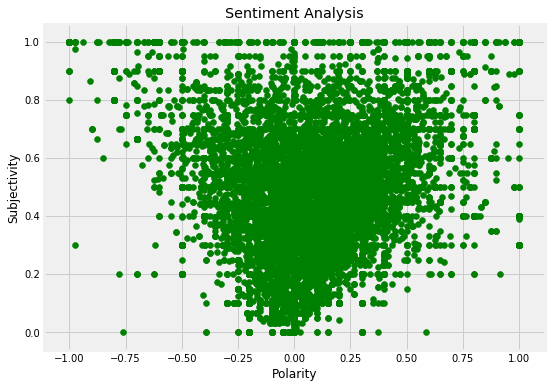

In [27]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, apc.shape[0]):
  plt.scatter(apc["Polarity"][i], apc["Subjectivity"][i], color='Green') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [28]:
# Print the percentage of positive tweets
ptweets = apc[apc.sentiment == 'Positive']
ptweets = ptweets['tidy_tweet']
ptweets

round( (ptweets.shape[0] / apc.shape[0]) * 100 , 1)

30.6

In [29]:
# Print the percentage of negative tweets
ntweets = apc[apc.sentiment == 'Negative']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / apc.shape[0]) * 100, 1)

17.3

In [30]:
# Print the percentage of neutral tweets
ntweets = apc[apc.sentiment == 'Neutral']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / apc.shape[0]) * 100, 1)

52.1

In [31]:
# Show the value counts
apc['sentiment'].value_counts()

Neutral     15734
Positive     9245
Negative     5208
Name: sentiment, dtype: int64

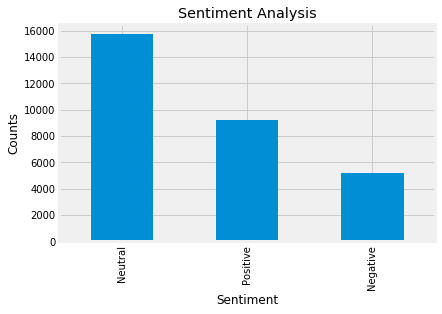

In [32]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
apc['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

### Word Frequencies

In [33]:
import nltk
from nltk.tokenize import word_tokenize
tweets = apc.tidy_tweet.str.cat(sep=' ')

In [34]:
#function to split text into word
tokens = word_tokenize(tweets)
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

38893


['.',
 ',',
 'the',
 'to',
 'APC',
 'Buhari',
 'and',
 'is',
 'of',
 'in',
 'for',
 'you',
 'a',
 'I',
 '!',
 '?',
 'will',
 'that',
 '...',
 'are',
 'not',
 "'s",
 'vote',
 '’',
 'this',
 'be',
 'PDP',
 'on',
 ':',
 'it',
 "n't",
 'Atiku',
 'Nigeria',
 'he',
 'have',
 'your',
 'we',
 'with',
 'has',
 'all',
 'do',
 'The',
 'they',
 'tomorrow',
 'as',
 'election',
 'Nigerians',
 's',
 'his',
 'by']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(apc['tidy_tweet'], 500)
#for word, freq in common_words:
    #print(word, freq)

In [36]:
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.head(10)

word  count
0     the  17375
1      to  15229
2  buhari  12171
3     apc  11341
4     and   9972
5      is   9363
6      of   9306
7      in   8431
8     you   8027
9     for   7801

In [37]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(apc['tidy_tweet'], 300)
#for word, freq in common_words:
    #print(word, freq)

In [38]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.head(10)

word  count
0       of the   1510
1     vote for   1277
2       in the   1162
3       to the    949
4      to vote    919
5    buhari is    799
6      will be    761
7   for buhari    742
8      for the    700
9  zamfara apc    692

In [39]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(apc['tidy_tweet'], 200)
#for word, freq in common_words:
    #print(word, freq)

In [40]:
df3 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.head(10)

word  count
0                 to vote for    320
1             vote for buhari    284
2  president muhammadu buhari    264
3      zamfara apc candidates    239
4             buhari will win    201
5             buhari vs atiku    197
6                 all the way    188
7                 apc and pdp    186
8               clash in kano    181
9               on the ballot    168

In [41]:
tokenized_tweet = apc['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Nigeria:, Caucus, Meeting:, APC,, PDP, Debate...
1    [Images, Of, Bullion, Van, Entering, Bourdillo...
2    [APC, Reps, Member,, Jibrin,, Arrested, Over, ...
3    [Putin-Maduro-signo, Libra., Jinete, de, la, b...
4            [APC, will, win, by, the, grace, of, God]
Name: tidy_tweet, dtype: object

In [42]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [nigeria:, caucu, meeting:, apc,, pdp, debat, ...
1    [imag, Of, bullion, van, enter, bourdillon,, h...
2    [apc, rep, member,, jibrin,, arrest, over, att...
3    [putin-maduro-signo, libra., jinet, de, la, ba...
4            [apc, will, win, by, the, grace, of, god]
Name: tidy_tweet, dtype: object

In [43]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

apc['tidy_tweet'] = tokenized_tweet

In [44]:
apc['tidy_tweet'] = apc['tidy_tweet'].astype(str)

In [45]:
party_id_df = apc[['sentiment','party']].drop_duplicates().sort_values('sentiment')
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'sentiment']].values)
# Pick 5 random samples from the dataframe
apc.sample(5, random_state=0)

original_text party  \
15962                      Walahi buhari is 90 years old   APC   
27863  I can't thank BUHARI enough for fighting Corru...   APC   
6278   Money can buy off common sense. It has been pr...   APC   
10673  He's right. APC till 2031 then KOWA takes over...   APC   
29957  Dear Nigerians, Please let's vote for Sowore t...   APC   

                                              tidy_tweet  Subjectivity  \
15962                       walahi buhari is 90 year old      0.200000   
27863  I can't thank buhari enough for fight corrupti...      0.500000   
6278   money can buy off common sense. It ha been pro...      0.500000   
10673  he' right. apc till 2031 then kowa take over. ...      0.535714   
29957  dear nigerians, pleas let' vote for sowor tomo...      0.333333   

       Polarity sentiment  sent  
15962  0.100000  Positive     1  
27863  0.000000   Neutral     0  
6278  -0.300000  Negative    -1  
10673  0.285714  Positive     1  
29957  0.166667  Positive     1

In [46]:
# Group the dataframe by categories and count items 
apc.groupby('sentiment').party.count()

sentiment
Negative     5208
Neutral     15734
Positive     9245
Name: party, dtype: int64

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
labels = apc.sentiment

In [49]:
labels.head()

0     Neutral
1     Neutral
2     Neutral
3     Neutral
4    Positive
Name: sentiment, dtype: object

In [50]:
text = apc['tidy_tweet']

In [51]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [52]:
features = tfidf.fit_transform(text).toarray()

In [53]:
features.shape

(30187, 7654)

In [54]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([('Negative', 'APC'), ('Neutral', 'APC'), ('Positive', 'APC')])

In [55]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('Negative', 'APC'), ('Neutral', 'APC'), ('Positive', 'APC')]

In [56]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for sentiment, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == sentiment)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  

# 'Negative':
  . Most correlated unigrams:
       . fake
       . fail
  . Most correlated bigrams:
       . fake news
       . bloodi clash
# 'Neutral':
  . Most correlated unigrams:
       . nan
       . win
  . Most correlated bigrams:
       . zamfara apc
       . buhari win
# 'Positive':
  . Most correlated unigrams:
       . good
       . win
  . Most correlated bigrams:
       . atiku win
       . buhari win


In [57]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [59]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [60]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [61]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

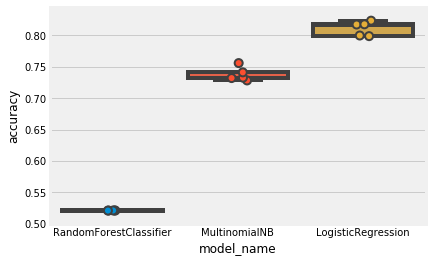

In [62]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [63]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.811542
MultinomialNB             0.738132
RandomForestClassifier    0.521218
Name: accuracy, dtype: float64

In [64]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.521199
1   RandomForestClassifier         1  0.521199
2   RandomForestClassifier         2  0.521285
3   RandomForestClassifier         3  0.521285
4   RandomForestClassifier         4  0.521120
5            MultinomialNB         0  0.756045
6            MultinomialNB         1  0.728387
7            MultinomialNB         2  0.732152
8            MultinomialNB         3  0.732814
9            MultinomialNB         4  0.741262
10      LogisticRegression         0  0.798940
11      LogisticRegression         1  0.799934
12      LogisticRegression         2  0.823588
13      LogisticRegression         3  0.817459
14      LogisticRegression         4  0.817790

In [65]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, apc.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 18.5, 'Predicted')

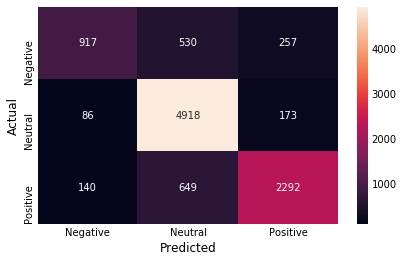

In [66]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.sentiment.values, yticklabels=party_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [67]:
model.fit(features, labels)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)